# Data findings

In this notebook we describe the data before and after preprocessing.

## Imports

In [30]:
import warnings 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings('ignore')
label_encoder = LabelEncoder()

In [31]:
# Import data

df_a = pd.read_csv('../data/BankA.csv')
df_b = pd.read_csv('../data/BankB.csv')
df_c = pd.read_csv('../data/BankC.csv')

df_all = pd.concat([df_a, df_b, df_c])
df_all.head()

,institute,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,Bank A,39,Private,208353,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298,0,50,United-States,>50K
1,Bank A,42,Private,189986,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,55,United-States,>50K
2,Bank A,56,?,321827,Bachelors,13,Married-spouse-absent,?,Other-relative,White,Female,0,0,15,United-States,<=50K
3,Bank A,34,Private,33945,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
4,Bank A,66,Self-emp-inc,31438,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,15024,0,40,United-States,>50K


## Functions

In [3]:
def print_value_counts(df: pd.DataFrame):
    '''Show value counts from categorical columns'''
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in df[categorical_columns].columns:
        print(f"Column: {column}")
        print(df[column].value_counts())
        print("\n" + "="*30 + "\n")

def print_value_counts_percentage(df: pd.DataFrame):
    '''Show value counts from categorical columns'''
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in df[categorical_columns].columns:
        print(f"Column: {column}")
        print((df[column].value_counts()/len(df[column])))
        print("\n" + "="*30 + "\n")

def _print_zero_val(df: pd.DataFrame, feature):
    '''helper function for show_zero_values()'''
    print(f'{feature}: in total: {df[feature][df[feature]==0].size} in percent: {df[feature][df[feature]==0].size / len(df) * 100:.2f}%')


def print_zero_values(df: pd.DataFrame, columns: list = None):
    '''Print amount of zero values in numerical features'''
    print('Amount of zero values:')
    if columns is None:
        columns = df.columns
    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            _print_zero_val(df, feature=col)


def plot_numerical_features(df: pd.DataFrame, columns: list = None, as_boxplt: bool = False):
    '''Plot numerical features for each numerical feature'''
    if columns is not None:
        numerical_columns = df[columns].select_dtypes(include='number').columns
    else:
        numerical_columns = df.select_dtypes(include='number').columns
    for column in numerical_columns:
        plt.figure(figsize=(12, 6))
        if as_boxplt:
            sns.boxplot(x='institute', y=column, data=df, palette='Set2')
            plt.title(f'Boxplot for \'{column}\' grouped by \'institute\'')
        else:
            sns.histplot(df[column], kde=True, color='skyblue')
            plt.title(f'Histogram for \'{column}\'')
        plt.ylabel(column)
        plt.show()


def plot_value_counts_by_institute(df: pd.DataFrame, columns: list = None):
    '''Plot grouped bar chart for each categorical feature'''
    if columns is not None:
        categorical_columns = df[columns].select_dtypes(include=['object']).columns
    else:
        categorical_columns = df.select_dtypes(include=['object']).columns
    for column in df[categorical_columns].columns:
        plt.figure(figsize=(12, 6))
        sns.countplot(x=column, hue='institute', data=df, palette='Set2')
        plt.title(f'Bar chart for \'{column}\' grouped by \'institute\'')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Institute', loc='upper right')
        plt.show()

def label_encode_columns(dataframe, columns_to_encode):
    label_encoder = LabelEncoder()

    for column in columns_to_encode:
        dataframe[column] = label_encoder.fit_transform(dataframe[column])

    return dataframe

def calc_vif(X):
    '''Calculate VIF Values for numerical Values'''
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

## Analytics

### Info

In [4]:
print(f"Datapoints of Bank A: {len(df_a)} // Datapoints of Bank B: {len(df_b)} // Datapoints of Bank C: {len(df_c)} ")

Datapoints of Bank A: 226164 // Datapoints of Bank B: 403240 // Datapoints of Bank C: 170595 


In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799999 entries, 0 to 170594
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   institute        799999 non-null  object
 1   age              799999 non-null  int64 
 2   workclass        799999 non-null  object
 3   fnlwgt           799999 non-null  int64 
 4   education        799999 non-null  object
 5   educational-num  799999 non-null  int64 
 6   marital-status   799999 non-null  object
 7   occupation       799999 non-null  object
 8   relationship     799999 non-null  object
 9   race             799999 non-null  object
 10  gender           799999 non-null  object
 11  capital-gain     799999 non-null  int64 
 12  capital-loss     799999 non-null  int64 
 13  hours-per-week   799999 non-null  int64 
 14  native-country   799999 non-null  object
 15  income           799999 non-null  object
dtypes: int64(6), object(10)
memory usage: 103.8+ MB


## Descriptive statistic

In [6]:
df_a.describe().T

,count,mean,std,min,25%,50%,75%,max
age,226164.0,40.189840,13.692167,17.0,29.0,39.0,49.0,90.0
fnlwgt,226164.0,188068.009546,105215.411280,19302.0,114952.5,177316.0,238077.0,1117718.0
educational-num,226164.0,11.864046,2.445484,1.0,10.0,13.0,13.0,16.0
capital-gain,226164.0,2087.121960,11175.295818,0.0,0.0,0.0,0.0,99999.0
capital-loss,226164.0,117.137126,461.883284,0.0,0.0,0.0,0.0,3683.0
hours-per-week,226164.0,42.065386,12.853645,1.0,40.0,40.0,50.0,99.0


In [7]:
df_b.describe().T

,count,mean,std,min,25%,50%,75%,max
age,403240.0,38.793106,14.404354,17.0,27.00,37.0,48.00,90.0
fnlwgt,403240.0,189043.065698,105969.359729,19302.0,115946.75,177769.0,239160.25,1117718.0
educational-num,403240.0,9.805513,1.772689,1.0,9.00,9.0,10.00,16.0
capital-gain,403240.0,818.403983,6274.889133,0.0,0.00,0.0,0.00,99999.0
capital-loss,403240.0,83.433181,390.261717,0.0,0.00,0.0,0.00,3683.0
hours-per-week,403240.0,40.111750,12.719453,1.0,38.00,40.0,45.00,99.0


In [8]:
df_c.describe().T

,count,mean,std,min,25%,50%,75%,max
age,170595.0,39.052669,15.926544,17.0,25.0,37.0,50.0,90.0
fnlwgt,170595.0,193632.530209,108558.580334,19302.0,118422.0,180738.0,245447.5,1117718.0
educational-num,170595.0,8.276304,3.001399,1.0,6.0,9.0,10.0,16.0
capital-gain,170595.0,775.548193,6246.212303,0.0,0.0,0.0,0.0,99999.0
capital-loss,170595.0,80.536071,384.793852,0.0,0.0,0.0,0.0,3683.0
hours-per-week,170595.0,38.681984,13.781024,1.0,35.0,40.0,43.0,99.0


## Value counts report for checking the characteristics

In [9]:
# check characteristics for categorical features
print_value_counts(df_all)

Column: institute
institute
Bank B    403240
Bank A    226164
Bank C    170595
Name: count, dtype: int64


Column: workclass
workclass
Private             546342
Self-emp-not-inc     66145
Local-gov            51137
?                    47431
State-gov            34717
Self-emp-inc         27715
Federal-gov          25879
Without-pay            348
Never-worked           285
Name: count, dtype: int64


Column: education
education
HS-grad         258661
Some-college    170592
Bachelors       133796
Masters          45697
Assoc-voc        33183
11th             31096
Assoc-acdm       24549
10th             24187
7th-8th          16452
Prof-school      13510
9th              13169
12th             10793
Doctorate         9802
5th-6th           8913
1st-4th           4174
Preschool         1425
Name: count, dtype: int64


Column: marital-status
marital-status
Married-civ-spouse       368226
Never-married            250510
Divorced                 110459
Widowed                   34203
Sepa

In [10]:
print_value_counts_percentage(df_a)

Column: institute
institute
Bank A    1.0
Name: count, dtype: float64


Column: workclass
workclass
Private             0.642313
Self-emp-not-inc    0.088427
Local-gov           0.084173
State-gov           0.056954
?                   0.043880
Self-emp-inc        0.043725
Federal-gov         0.039896
Without-pay         0.000455
Never-worked        0.000177
Name: count, dtype: float64


Column: education
education
Bachelors       0.414734
HS-grad         0.171583
Masters         0.141176
Some-college    0.113126
Prof-school     0.041810
Doctorate       0.030000
Assoc-voc       0.022024
Assoc-acdm      0.016232
11th            0.014087
10th            0.010767
7th-8th         0.007534
9th             0.005814
12th            0.004873
5th-6th         0.003811
1st-4th         0.001839
Preschool       0.000588
Name: count, dtype: float64


Column: marital-status
marital-status
Married-civ-spouse       0.509179
Never-married            0.292381
Divorced                 0.127133
Widowed    

In [11]:
print_value_counts_percentage(df_b)

Column: institute
institute
Bank B    1.0
Name: count, dtype: float64


Column: workclass
workclass
Private             0.696518
Self-emp-not-inc    0.079595
?                   0.060550
Local-gov           0.058323
State-gov           0.040403
Self-emp-inc        0.032251
Federal-gov         0.031636
Without-pay         0.000394
Never-worked        0.000330
Name: count, dtype: float64


Column: education
education
HS-grad         0.449626
Some-college    0.296178
Bachelors       0.065651
Assoc-voc       0.057187
Assoc-acdm      0.042578
Masters         0.022835
11th            0.015269
10th            0.011923
7th-8th         0.008127
Prof-school     0.006678
9th             0.006497
12th            0.005441
Doctorate       0.004950
5th-6th         0.004342
1st-4th         0.002046
Preschool       0.000672
Name: count, dtype: float64


Column: marital-status
marital-status
Married-civ-spouse       0.445437
Never-married            0.316127
Divorced                 0.147756
Widowed    

In [12]:
print_value_counts_percentage(df_c)

Column: institute
institute
Bank C    1.0
Name: count, dtype: float64


Column: workclass
workclass
Private             0.704651
Self-emp-not-inc    0.082359
?                   0.076737
Local-gov           0.050306
State-gov           0.032498
Self-emp-inc        0.028260
Federal-gov         0.024028
Never-worked        0.000657
Without-pay         0.000504
Name: count, dtype: float64


Column: education
education
HS-grad         0.225962
Some-college    0.149922
11th            0.127513
10th            0.099323
Bachelors       0.079281
7th-8th         0.067241
9th             0.054128
12th            0.043946
5th-6th         0.036930
Assoc-voc       0.030142
Masters         0.026730
Assoc-acdm      0.021742
1st-4th         0.017193
Prof-school     0.007978
Doctorate       0.005985
Preschool       0.005985
Name: count, dtype: float64


Column: marital-status
marital-status
Married-civ-spouse       0.430552
Never-married            0.333591
Divorced                 0.129693
Widowed    

## VIF Values:

### Bank A

In [13]:
numeric_cols = df_a.select_dtypes(include=['int64']).columns

calc_vif(df_a[numeric_cols])

,variables,VIF
0,age,8.159800
1,fnlwgt,3.780460
2,educational-num,14.857401
3,capital-gain,1.052536
4,capital-loss,1.075913
5,hours-per-week,10.359641


### Bank B

In [14]:
numeric_cols = df_b.select_dtypes(include=['int64']).columns

calc_vif(df_b[numeric_cols])

,variables,VIF
0,age,7.092842
1,fnlwgt,3.827492
2,educational-num,13.843884
3,capital-gain,1.025078
4,capital-loss,1.052418
5,hours-per-week,9.696312


### Bank C

In [ ]:
numeric_cols = df_c.select_dtypes(include=['int64']).columns

calc_vif(df_c[numeric_cols])

### Bank A/B/C

In [15]:
numeric_cols = df_all.select_dtypes(include=['int64']).columns

calc_vif(df_all[numeric_cols])

,variables,VIF
0,age,6.594976
1,fnlwgt,3.636538
2,educational-num,10.386573
3,capital-gain,1.034679
4,capital-loss,1.059485
5,hours-per-week,9.043328


## Vizulations

### Barplots

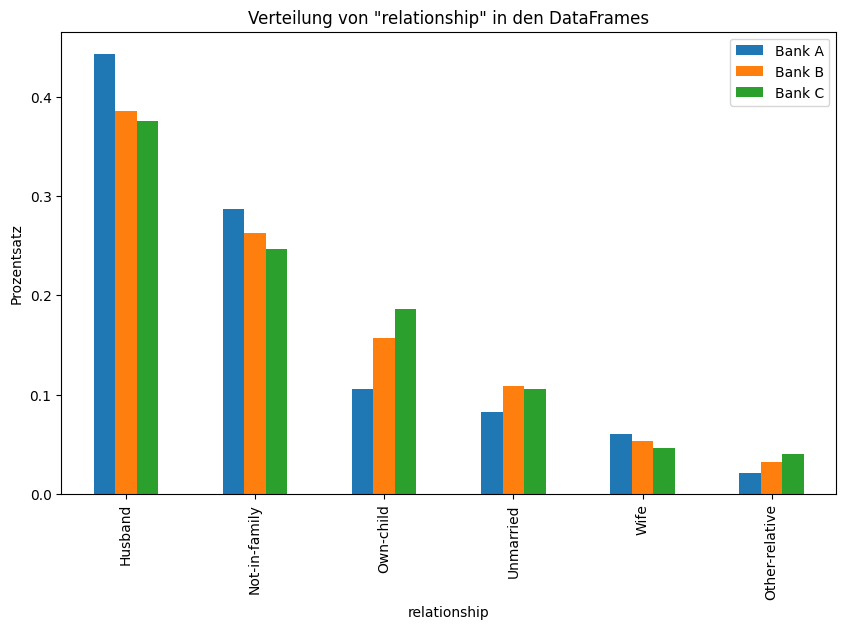

                  Bank A    Bank B    Bank C
relationship                                
Husband         0.443687  0.385431  0.375996
Not-in-family   0.286717  0.262935  0.246355
Own-child       0.105963  0.157271  0.186055
Unmarried       0.082582  0.108895  0.105185
Wife            0.060262  0.052983  0.046092
Other-relative  0.020790  0.032484  0.040318


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Annahme: Sie haben bereits df_a und df_b erstellt

# DataFrame df_a
data_a = pd.DataFrame(df_a["relationship"].value_counts() / len(df_a))
data_a.columns = ['Bank A']

# DataFrame df_b
data_b = pd.DataFrame(df_b["relationship"].value_counts() / len(df_b))
data_b.columns = ['Bank B']
data_c = pd.DataFrame(df_c["relationship"].value_counts() / len(df_c))
data_c.columns = ['Bank C']

# Merge DataFrames
merged_data = pd.concat([data_a, data_b, data_c], axis=1)

# Plot
merged_data.plot(kind='bar', figsize=(10, 6))
plt.title('Verteilung von "relationship" in den DataFrames')
plt.xlabel('relationship')
plt.ylabel('Prozentsatz')
plt.show()
print(merged_data)

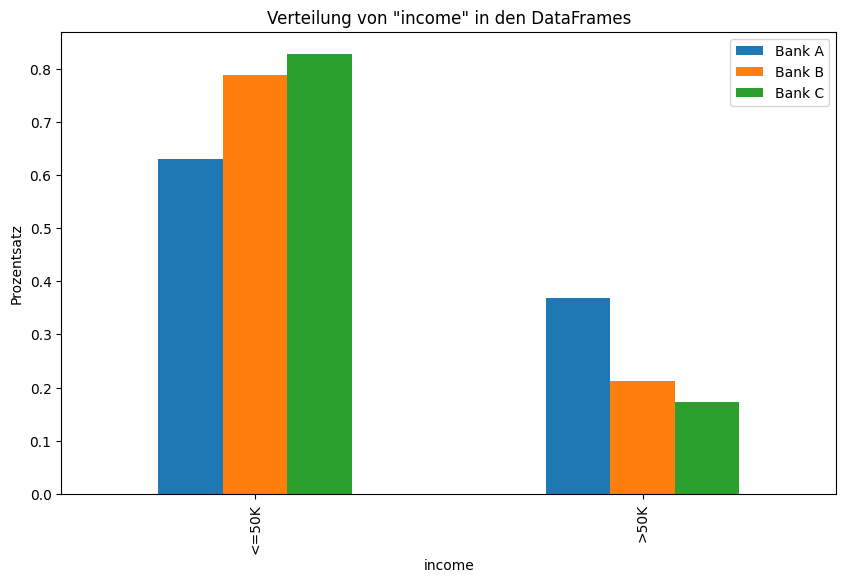

          Bank A    Bank B    Bank C
income                              
<=50K   0.630799  0.787581  0.827697
>50K    0.369201  0.212419  0.172303


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Annahme: Sie haben bereits df_a und df_b erstellt

# DataFrame df_a
data_a = pd.DataFrame(df_a["income"].value_counts() / len(df_a))
data_a.columns = ['Bank A']

# DataFrame df_b
data_b = pd.DataFrame(df_b["income"].value_counts() / len(df_b))
data_b.columns = ['Bank B']
data_c = pd.DataFrame(df_c["income"].value_counts() / len(df_c))
data_c.columns = ['Bank C']

# Merge DataFrames
merged_data = pd.concat([data_a, data_b, data_c], axis=1)

# Plot
merged_data.plot(kind='bar', figsize=(10, 6))
plt.title('Verteilung von "income" in den DataFrames')
plt.xlabel('income')
plt.ylabel('Prozentsatz')
plt.show()
print(merged_data)

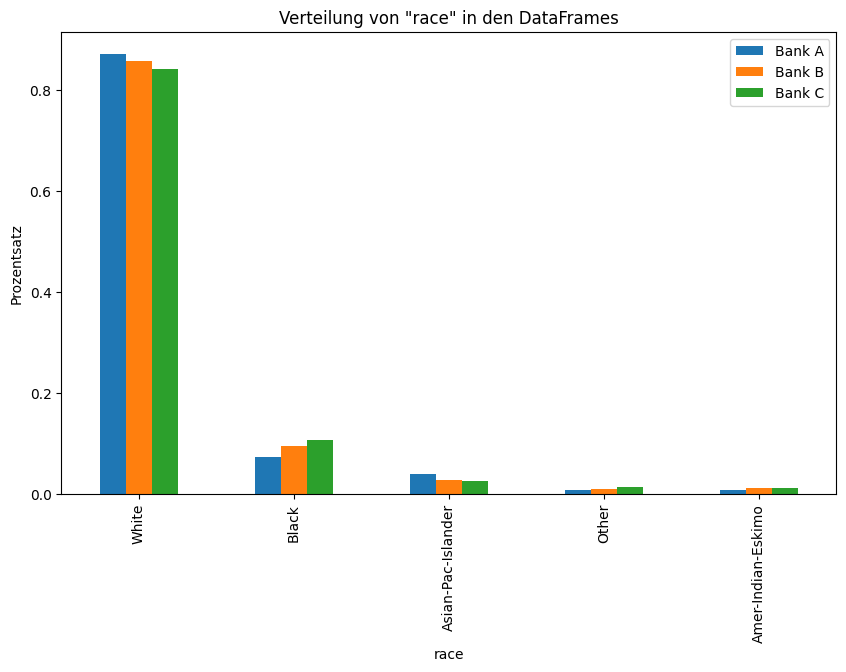

                      Bank A    Bank B    Bank C
race                                            
White               0.871752  0.856907  0.841162
Black               0.072797  0.095673  0.105970
Asian-Pac-Islander  0.039312  0.026758  0.026138
Other               0.008215  0.009059  0.014209
Amer-Indian-Eskimo  0.007923  0.011604  0.012521


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Annahme: Sie haben bereits df_a und df_b erstellt

# DataFrame df_a
data_a = pd.DataFrame(df_a["race"].value_counts() / len(df_a))
data_a.columns = ['Bank A']

# DataFrame df_b
data_b = pd.DataFrame(df_b["race"].value_counts() / len(df_b))
data_b.columns = ['Bank B']
data_c = pd.DataFrame(df_c["race"].value_counts() / len(df_c))
data_c.columns = ['Bank C']

# Merge DataFrames
merged_data = pd.concat([data_a, data_b, data_c], axis=1)

# Plot
merged_data.plot(kind='bar', figsize=(10, 6))
plt.title('Verteilung von "race" in den DataFrames')
plt.xlabel('race')
plt.ylabel('Prozentsatz')
plt.show()
print(merged_data)

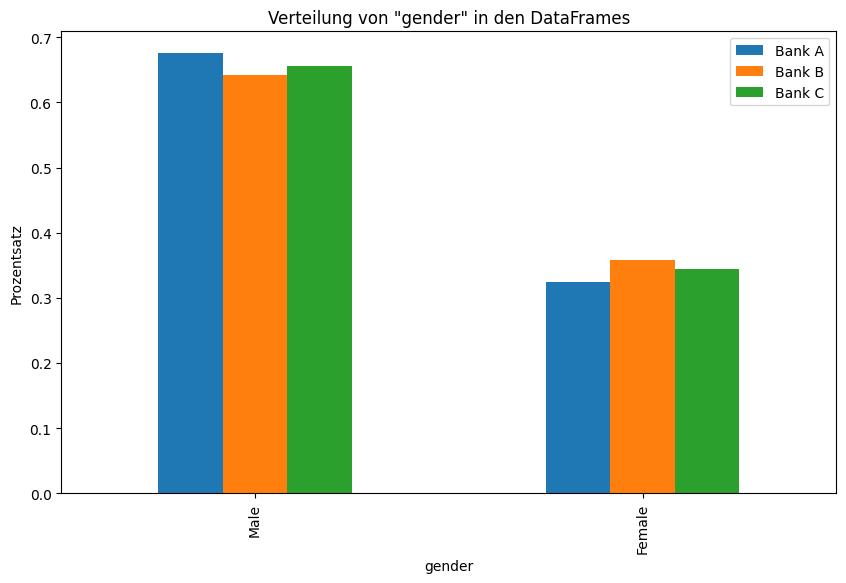

          Bank A    Bank B    Bank C
gender                              
Male    0.675037  0.641531  0.656385
Female  0.324963  0.358469  0.343615


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Annahme: Sie haben bereits df_a und df_b erstellt

# DataFrame df_a
data_a = pd.DataFrame(df_a["gender"].value_counts() / len(df_a))
data_a.columns = ['Bank A']

# DataFrame df_b
data_b = pd.DataFrame(df_b["gender"].value_counts() / len(df_b))
data_b.columns = ['Bank B']
data_c = pd.DataFrame(df_c["gender"].value_counts() / len(df_c))
data_c.columns = ['Bank C']

# Merge DataFrames
merged_data = pd.concat([data_a, data_b, data_c], axis=1)

# Plot
merged_data.plot(kind='bar', figsize=(10, 6))
plt.title('Verteilung von "gender" in den DataFrames')
plt.xlabel('gender')
plt.ylabel('Prozentsatz')
plt.show()
print(merged_data)

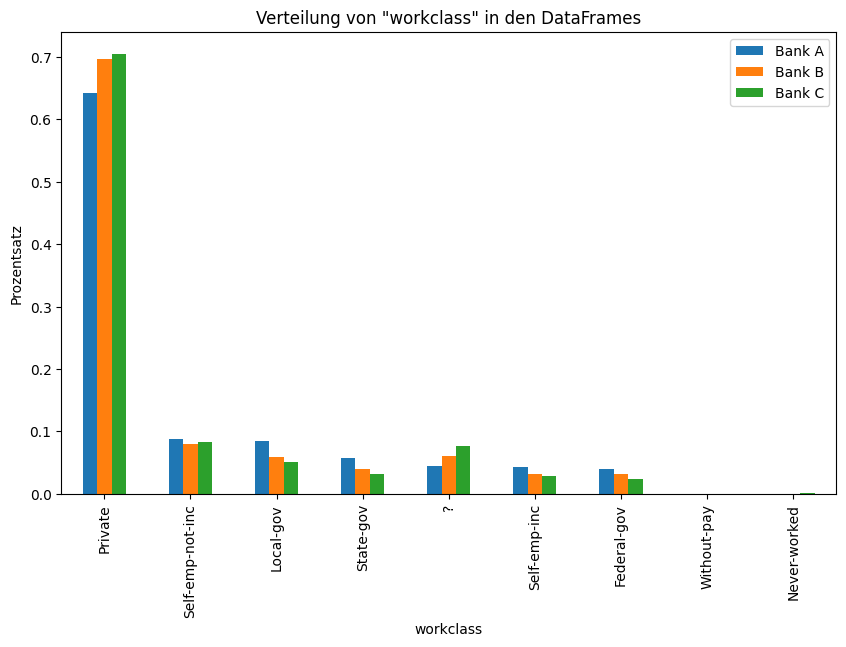

                    Bank A    Bank B    Bank C
workclass                                     
Private           0.642313  0.696518  0.704651
Self-emp-not-inc  0.088427  0.079595  0.082359
Local-gov         0.084173  0.058323  0.050306
State-gov         0.056954  0.040403  0.032498
?                 0.043880  0.060550  0.076737
Self-emp-inc      0.043725  0.032251  0.028260
Federal-gov       0.039896  0.031636  0.024028
Without-pay       0.000455  0.000394  0.000504
Never-worked      0.000177  0.000330  0.000657


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Annahme: Sie haben bereits df_a und df_b erstellt

# DataFrame df_a
data_a = pd.DataFrame(df_a["workclass"].value_counts() / len(df_a))
data_a.columns = ['Bank A']

# DataFrame df_b
data_b = pd.DataFrame(df_b["workclass"].value_counts() / len(df_b))
data_b.columns = ['Bank B']
data_c = pd.DataFrame(df_c["workclass"].value_counts() / len(df_c))
data_c.columns = ['Bank C']

# Merge DataFrames
merged_data = pd.concat([data_a, data_b, data_c], axis=1)

# Plot
merged_data.plot(kind='bar', figsize=(10, 6))
plt.title('Verteilung von "workclass" in den DataFrames')
plt.xlabel('workclass')
plt.ylabel('Prozentsatz')
plt.show()
print(merged_data)

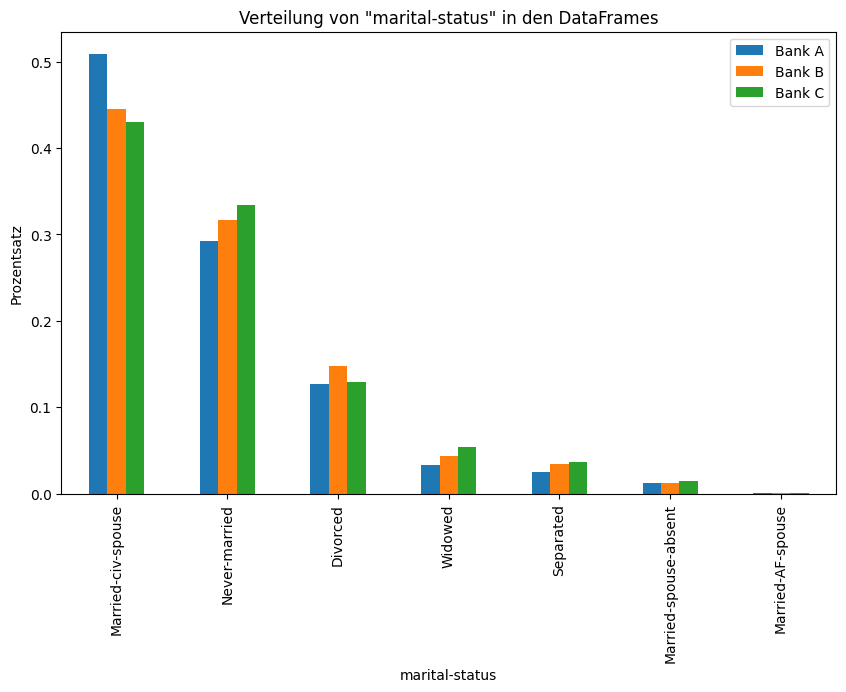

                         Bank A    Bank B    Bank C
marital-status                                     
Married-civ-spouse     0.509179  0.445437  0.430552
Never-married          0.292381  0.316127  0.333591
Divorced               0.127133  0.147756  0.129693
Widowed                0.032963  0.043555  0.053841
Separated              0.024995  0.033722  0.037017
Married-spouse-absent  0.012579  0.012625  0.014684
Married-AF-spouse      0.000769  0.000779  0.000621


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Annahme: Sie haben bereits df_a und df_b erstellt

# DataFrame df_a
data_a = pd.DataFrame(df_a["marital-status"].value_counts() / len(df_a))
data_a.columns = ['Bank A']

# DataFrame df_b
data_b = pd.DataFrame(df_b["marital-status"].value_counts() / len(df_b))
data_b.columns = ['Bank B']
data_c = pd.DataFrame(df_c["marital-status"].value_counts() / len(df_c))
data_c.columns = ['Bank C']

# Merge DataFrames
merged_data = pd.concat([data_a, data_b, data_c], axis=1)

# Plot
merged_data.plot(kind='bar', figsize=(10, 6))
plt.title('Verteilung von "marital-status" in den DataFrames')
plt.xlabel('marital-status')
plt.ylabel('Prozentsatz')
plt.show()
print(merged_data)

In [19]:
df_all

,institute,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,Bank A,39,Private,208353,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298,0,50,United-States,>50K
1,Bank A,42,Private,189986,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,55,United-States,>50K
2,Bank A,56,?,321827,Bachelors,13,Married-spouse-absent,?,Other-relative,White,Female,0,0,15,United-States,<=50K
3,Bank A,34,Private,33945,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
4,Bank A,66,Self-emp-inc,31438,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,15024,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170590,Bank C,17,Private,155644,10th,6,Never-married,Sales,Own-child,White,Male,0,0,36,United-States,<=50K
170591,Bank C,17,Private,296170,11th,7,Never-married,Other-service,Own-child,White,Male,0,0,20,United-States,<=50K
170592,Bank C,28,Federal-gov,427458,9th,5,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
170593,Bank C,17,Private,179517,11th,7,Never-married,Other-service,Own-child,White,Female,0,0,5,United-States,<=50K


### Correlation

In [22]:
columns_to_encode = ['workclass', 'education', 'marital-status', 'relationship', 'race', 'gender', 'native-country', 'occupation', 'income']
df_a_label_encoded = label_encode_columns(df_a, columns_to_encode)
df_a_label_encoded = df_a_label_encoded.drop(["institute", "educational-num"], axis=1)

df_b_label_encoded = label_encode_columns(df_b, columns_to_encode)
df_b_label_encoded = df_b_label_encoded.drop(["institute", "educational-num"], axis=1)

df_c_label_encoded = label_encode_columns(df_c, columns_to_encode)
df_c_label_encoded = df_c_label_encoded.drop(["institute", "educational-num"], axis=1)

df_all_label_encoded = label_encode_columns(df_all, columns_to_encode)
df_all_label_encoded = df_all_label_encoded.drop(["institute", "educational-num"], axis=1)

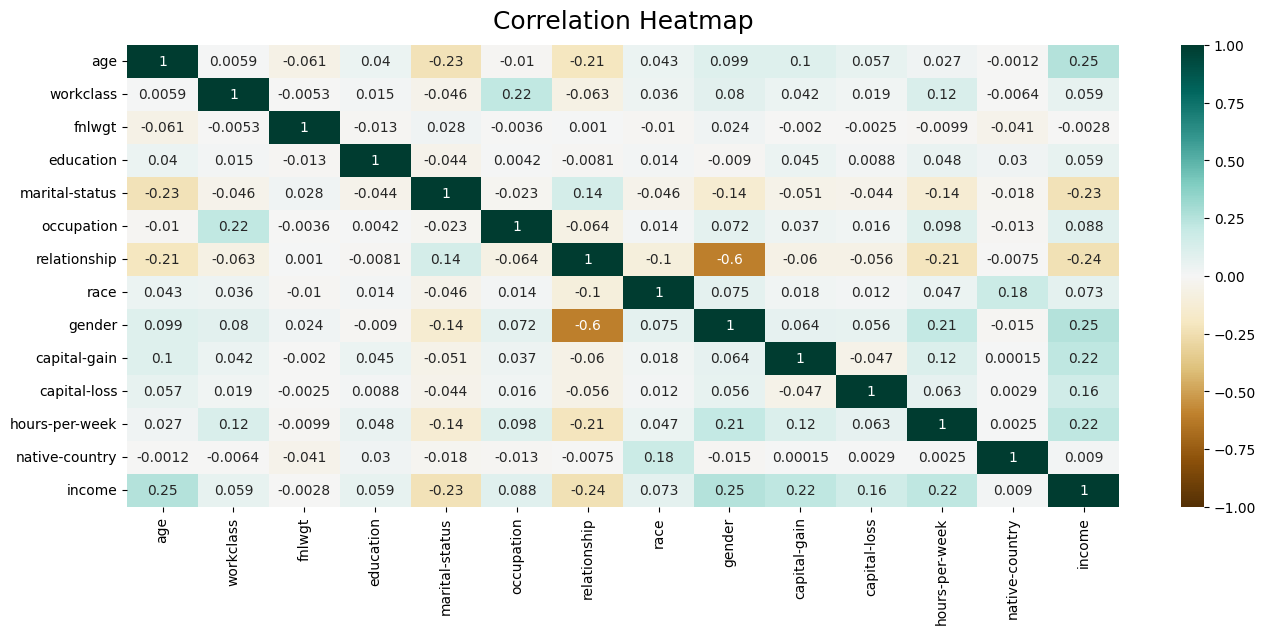

In [23]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_a_label_encoded.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

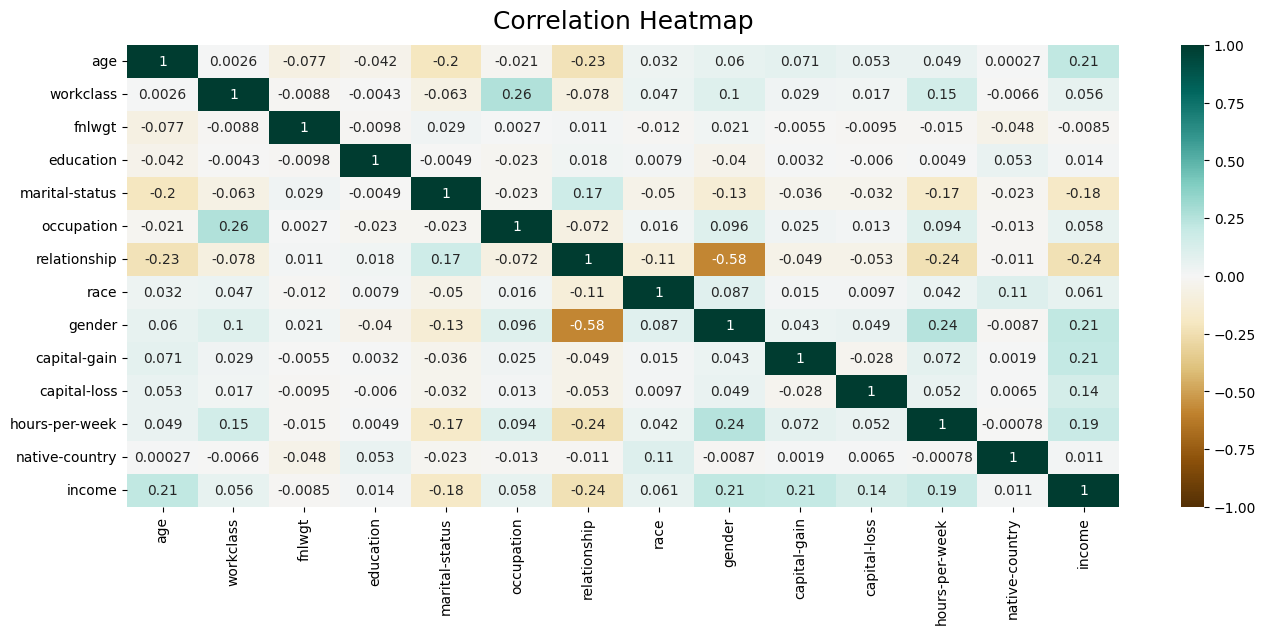

In [24]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_b_label_encoded.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

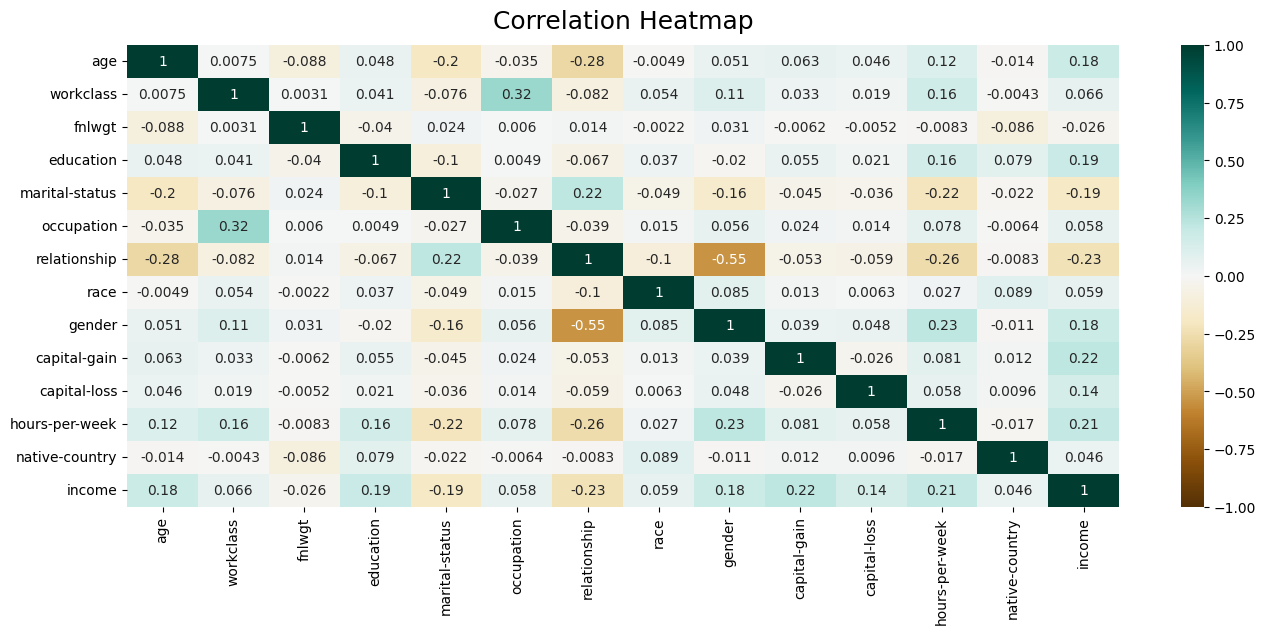

In [25]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_c_label_encoded.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

## Preprocessing

In [26]:
df_a = pd.read_csv('../data/BankA.csv')
df_b = pd.read_csv('../data/BankB.csv')
df_c = pd.read_csv('../data/BankC.csv')

df_all = pd.concat([df_a, df_b, df_c])

In [27]:
def pre_processing(df: pd.DataFrame):
    df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    df['workclass'] = df['workclass'].replace(['Never-worked', 'Without-pay'], 'Not-working')
    df['workclass'] = df['workclass'].replace(['?', '*'], 'unknown')
    df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'Married')
    df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
    df['occupation'] = df['occupation'].replace(['Exec-managerial', 'Prof-specialty'], 'high')
    df['occupation'] = df['occupation'].replace(['Armed-Forces', 'Protective-serv', 'Tech-support', 'Sales', 'Craft-repair', 'Transport-moving'], 'medium')
    df['occupation'] = df['occupation'].replace(['Adm-clerical', 'Machine-op-inspct', 'Farming-fishing', 'Handlers-cleaners', 'Other-service', 'Priv-house-serv'], 'low')
    df['occupation'] = df['occupation'].replace(['?'], 'unknown')
    df['relationship'] = df['relationship'].replace(['Husband', 'Wife'], 'Parent')
    df['native-country'] = df['native-country'].str.strip()
    df['native-country'] = df['native-country'].replace(['United-States', 'Puerto-Rico', 'Canada', 'Outlying-US(Guam-USVI-etc)', 'Cuba', 'Jamaica', 'Mexico', 'Dominican-Republic', 'El-Salvador', 'Guatemala', 'Haiti', 'Honduras', 'Nicaragua', 'Trinadad&Tobago', 'Peru', 'Ecuador', 'Columbia', 'Honduras', 'Haiti', 'Guatemala', 'El-Salvador', 'Dominican-Republic', 'Columbia', 'Ecuador', 'Peru', 'Jamaica', 'Mexico', 'Puerto-Rico', 'Cuba', 'Outlying-US(Guam-USVI-etc)', 'Canada', 'United-States'], 'North-America')
    df['native-country'] = df['native-country'].replace(['Germany', 'England', 'Italy', 'Poland', 'Portugal', 'Ireland', 'France', 'Yugoslavia', 'Scotland', 'Greece', 'Hungary', 'Holand-Netherlands'], 'Europe')
    df['native-country'] = df['native-country'].replace(['Philippines', 'India', 'China', 'Japan', 'Vietnam', 'Taiwan', 'Iran', 'Thailand', 'Hong', 'Cambodia', 'Laos'], 'Asia')
    df['native-country'] = df['native-country'].replace(['South', 'Columbia', 'Ecuador', 'Peru'], 'South-America')
    df['native-country'] = df['native-country'].replace(['Trinadad&Tobago', 'Honduras', 'Haiti', 'Guatemala', 'El-Salvador', 'Dominican-Republic', 'Columbia', 'Ecuador', 'Peru'], 'Central-America')
    df['native-country'] = df['native-country'].replace(['?', '*'], 'Unknown')
    df['education'] = df['education'].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th'], 'school')
    df['education'] = df['education'].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
    df['race'] = df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'], 'Other')
    return df

In [28]:
df_a = pre_processing(df_a)
df_b = pre_processing(df_b)
df_c = pre_processing(df_c)
df = pre_processing(df_all)


In [29]:
df_all

,institute,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,Bank A,39,Private,208353,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298,0,50,United-States,>50K
1,Bank A,42,Private,189986,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,55,United-States,>50K
2,Bank A,56,?,321827,Bachelors,13,Married-spouse-absent,?,Other-relative,White,Female,0,0,15,United-States,<=50K
3,Bank A,34,Private,33945,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
4,Bank A,66,Self-emp-inc,31438,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,15024,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170590,Bank C,17,Private,155644,10th,6,Never-married,Sales,Own-child,White,Male,0,0,36,United-States,<=50K
170591,Bank C,17,Private,296170,11th,7,Never-married,Other-service,Own-child,White,Male,0,0,20,United-States,<=50K
170592,Bank C,28,Federal-gov,427458,9th,5,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
170593,Bank C,17,Private,179517,11th,7,Never-married,Other-service,Own-child,White,Female,0,0,5,United-States,<=50K


In [30]:
# Check zero val from numerical features
print_zero_values(df)

Amount of zero values:
age: in total: 0 in percent: 0.00%
fnlwgt: in total: 0 in percent: 0.00%
educational-num: in total: 0 in percent: 0.00%
capital-gain: in total: 731697 in percent: 91.46%
capital-loss: in total: 760339 in percent: 95.04%
hours-per-week: in total: 0 in percent: 0.00%
income: in total: 601449 in percent: 75.18%


## Visualize value counts from all banks

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


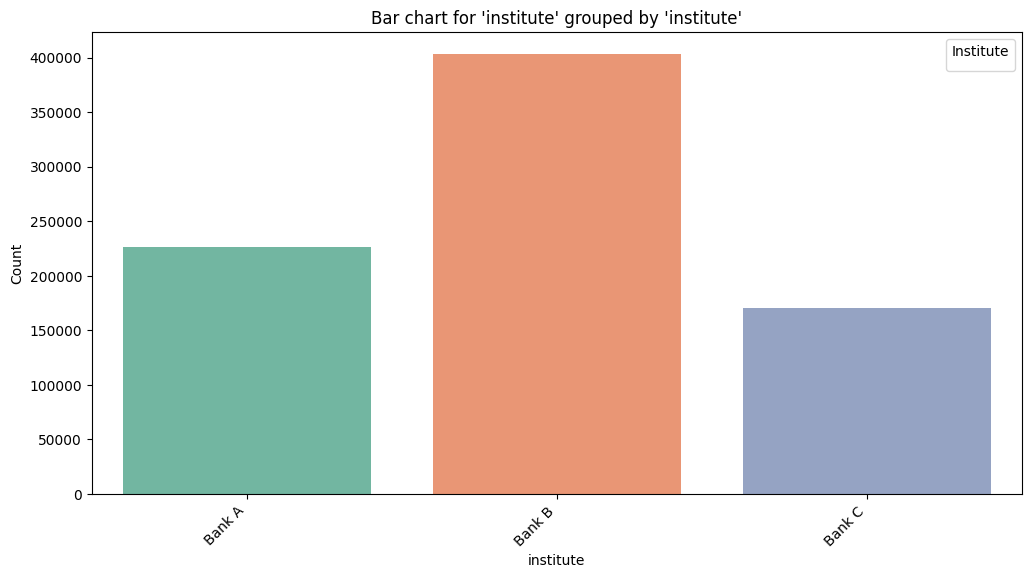

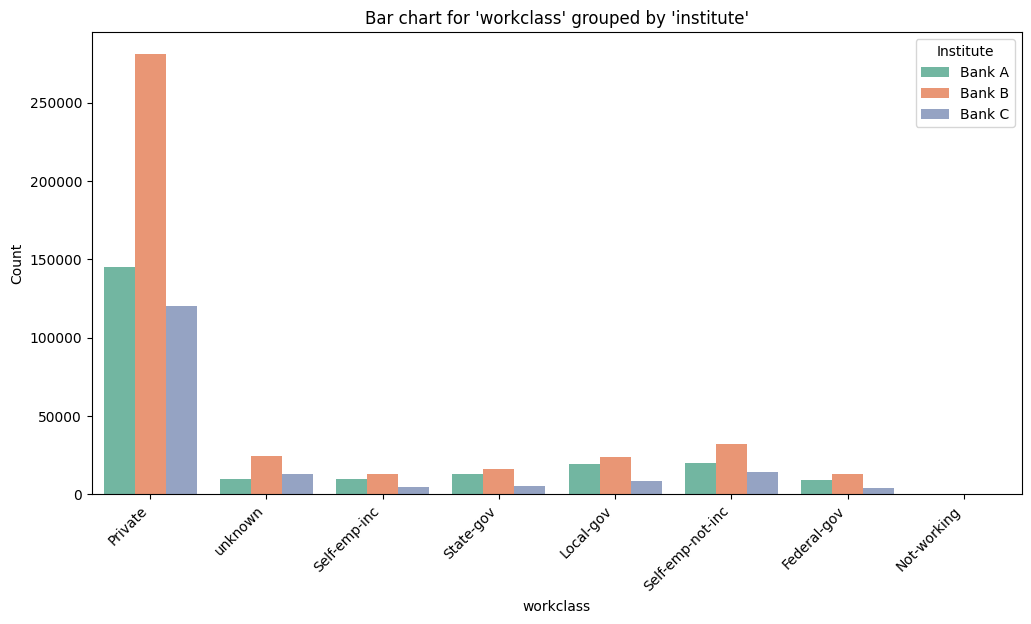

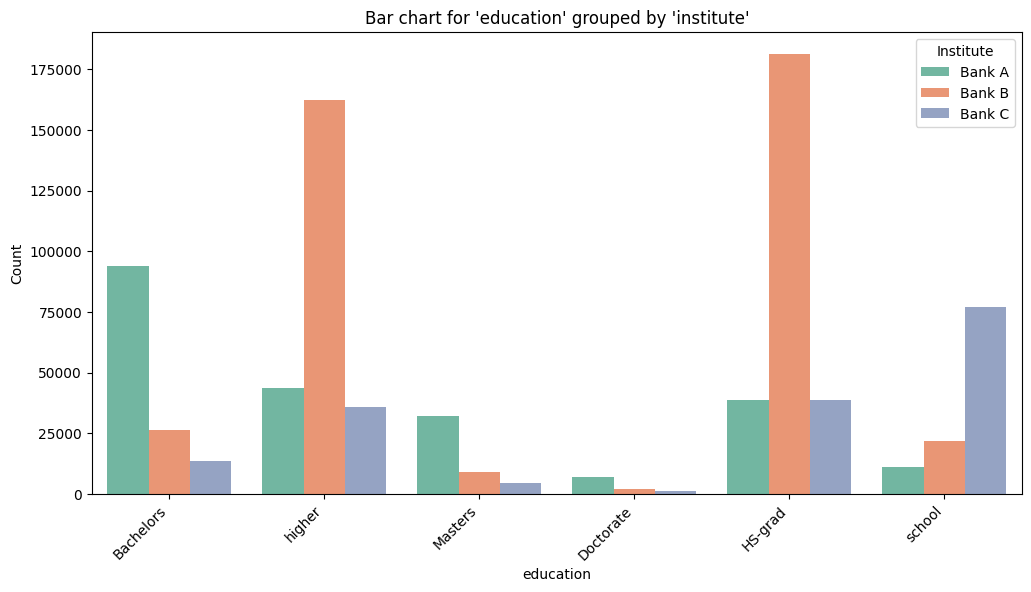

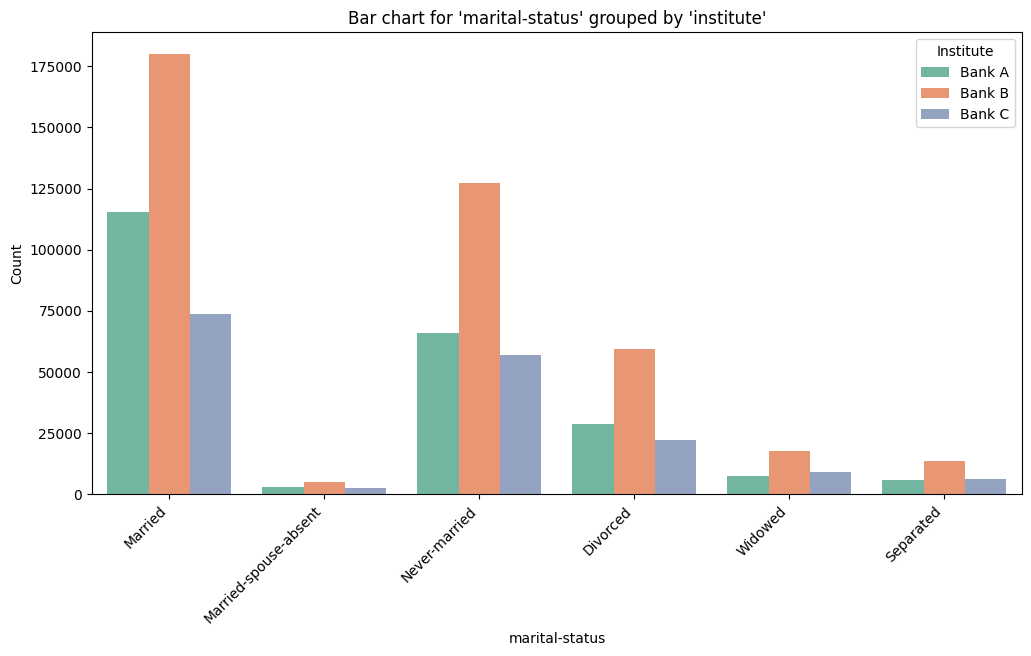

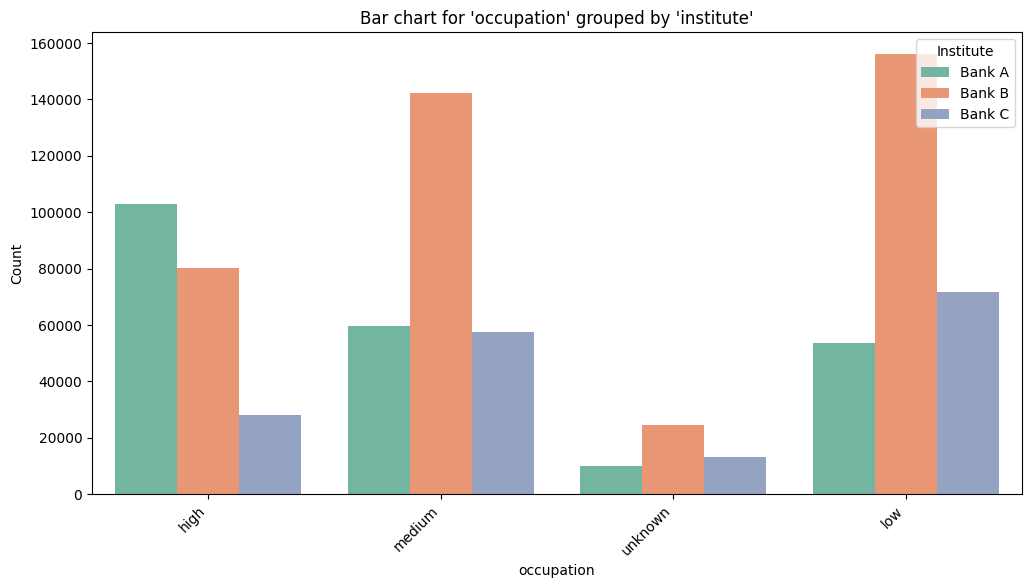

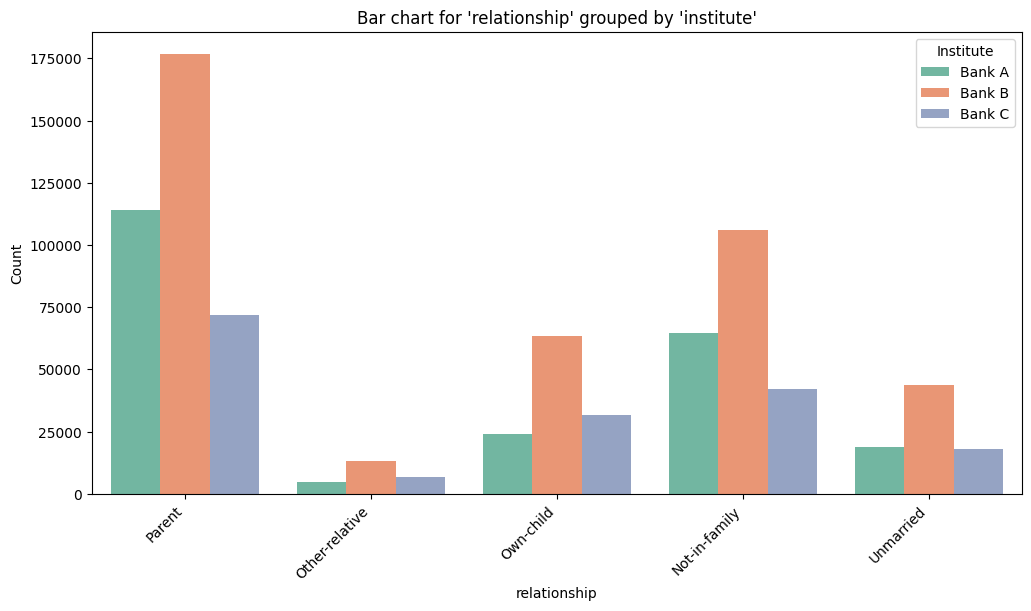

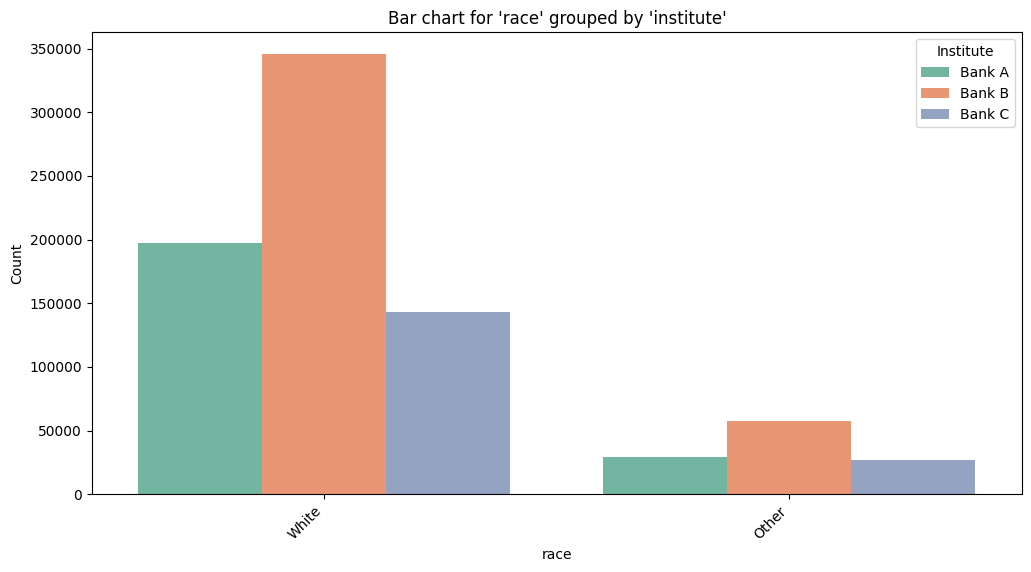

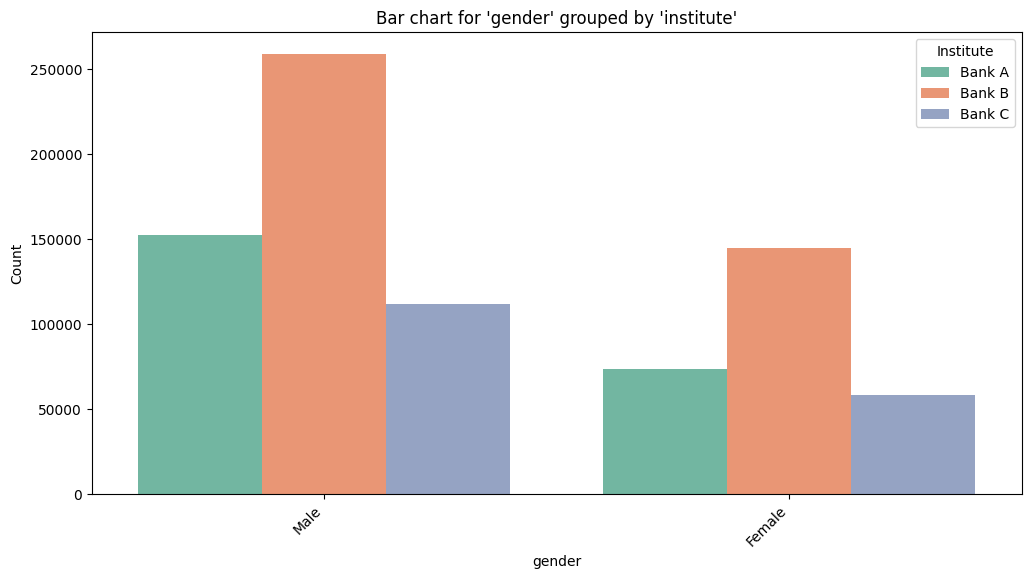

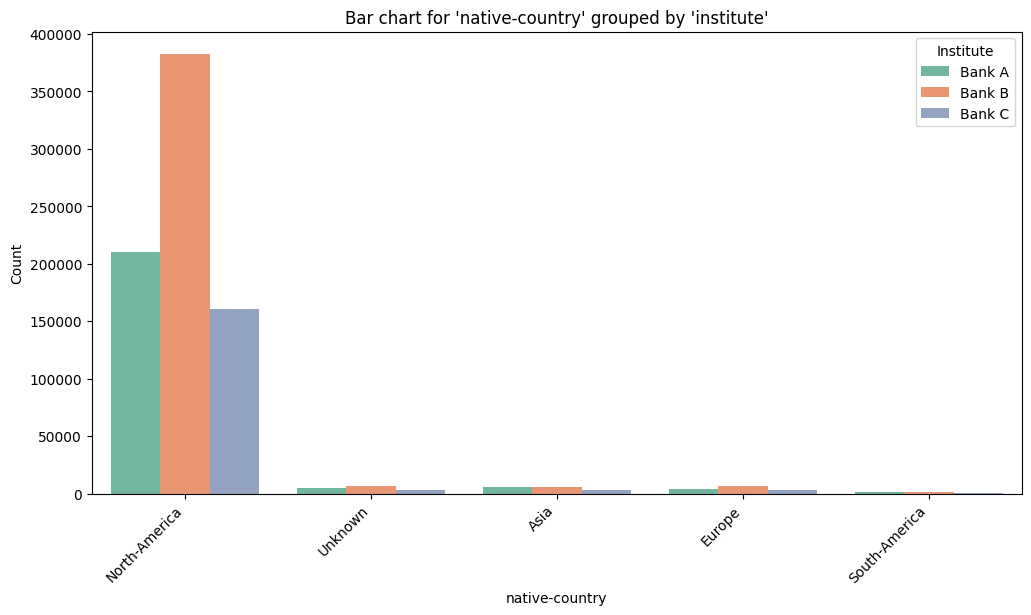

In [31]:
plot_value_counts_by_institute(df)

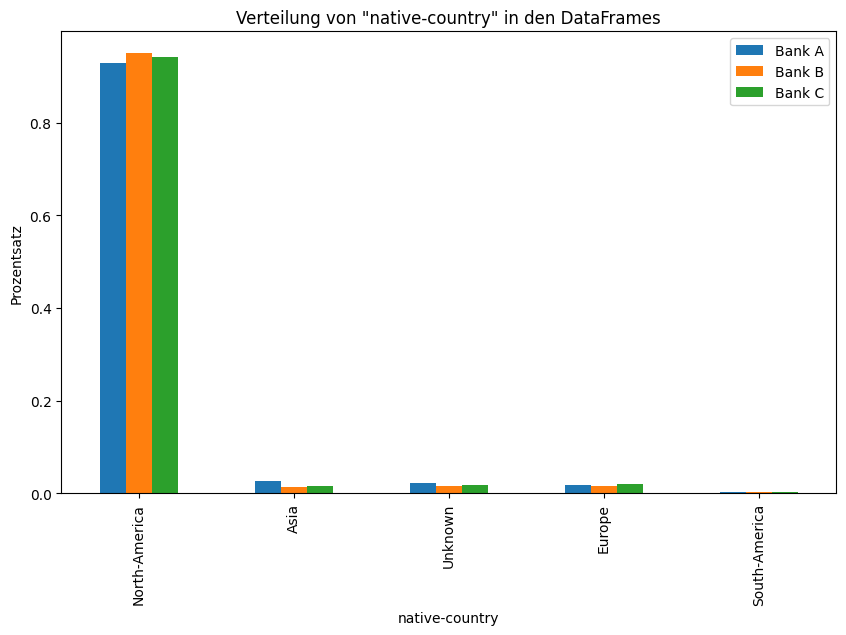

                  Bank A    Bank B    Bank C
native-country                              
North-America   0.929591  0.949603  0.942448
Asia            0.026003  0.014927  0.016378
Unknown         0.021935  0.015554  0.018506
Europe          0.018345  0.016759  0.019731
South-America   0.004125  0.003157  0.002937


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Annahme: Sie haben bereits df_a und df_b erstellt

# DataFrame df_a
data_a = pd.DataFrame(df_a["native-country"].value_counts() / len(df_a))
data_a.columns = ['Bank A']

# DataFrame df_b
data_b = pd.DataFrame(df_b["native-country"].value_counts() / len(df_b))
data_b.columns = ['Bank B']
data_c = pd.DataFrame(df_c["native-country"].value_counts() / len(df_c))
data_c.columns = ['Bank C']

# Merge DataFrames
merged_data = pd.concat([data_a, data_b, data_c], axis=1)

# Plot
merged_data.plot(kind='bar', figsize=(10, 6))
plt.title('Verteilung von "native-country" in den DataFrames')
plt.xlabel('native-country')
plt.ylabel('Prozentsatz')
plt.show()
print(merged_data)

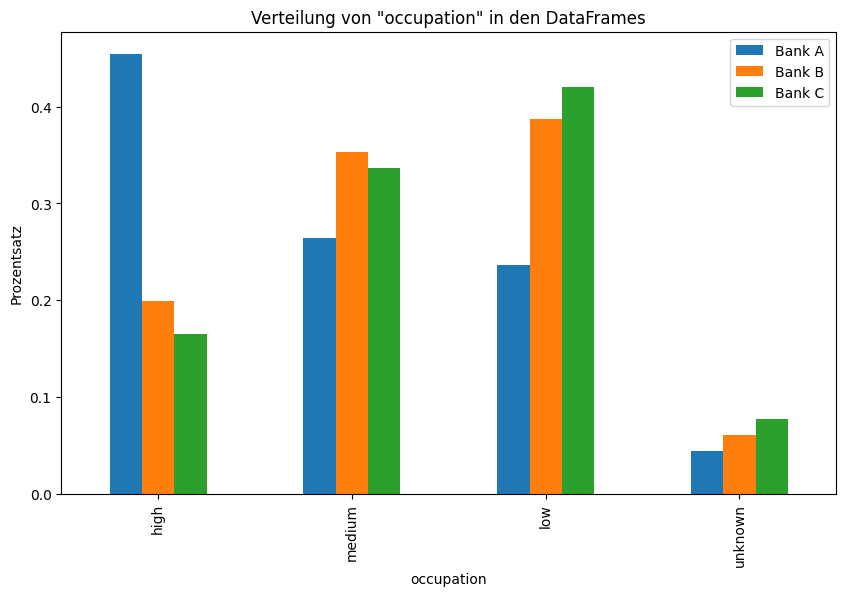

              Bank A    Bank B    Bank C
occupation                              
high        0.454741  0.199162  0.165151
medium      0.264596  0.352929  0.337020
low         0.236545  0.386941  0.420264
unknown     0.044118  0.060969  0.077564


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Annahme: Sie haben bereits df_a und df_b erstellt

# DataFrame df_a
data_a = pd.DataFrame(df_a["occupation"].value_counts() / len(df_a))
data_a.columns = ['Bank A']

# DataFrame df_b
data_b = pd.DataFrame(df_b["occupation"].value_counts() / len(df_b))
data_b.columns = ['Bank B']
data_c = pd.DataFrame(df_c["occupation"].value_counts() / len(df_c))
data_c.columns = ['Bank C']

# Merge DataFrames
merged_data = pd.concat([data_a, data_b, data_c], axis=1)

# Plot
merged_data.plot(kind='bar', figsize=(10, 6))
plt.title('Verteilung von "occupation" in den DataFrames')
plt.xlabel('occupation')
plt.ylabel('Prozentsatz')
plt.show()
print(merged_data)

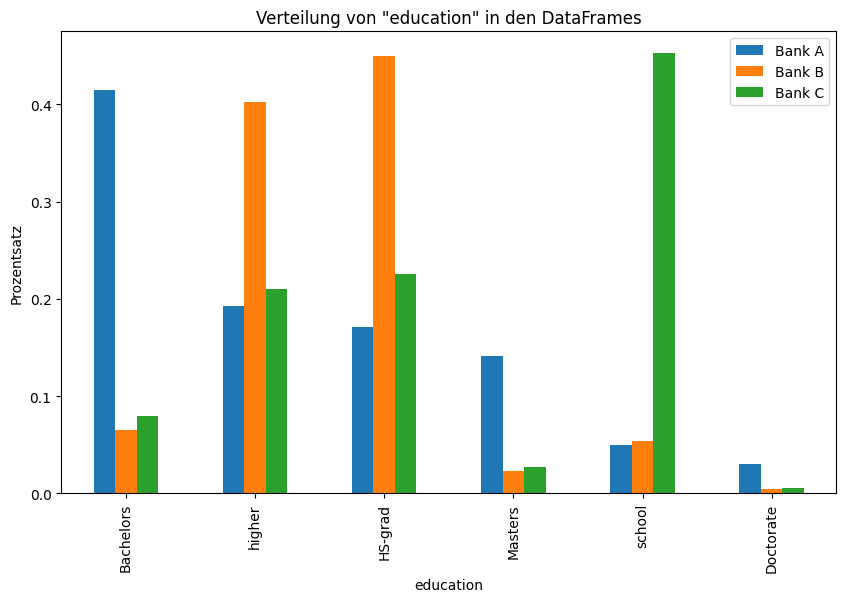

             Bank A    Bank B    Bank C
education                              
Bachelors  0.414734  0.065651  0.079281
higher     0.193192  0.402621  0.209783
HS-grad    0.171583  0.449626  0.225962
Masters    0.141176  0.022835  0.026730
school     0.049314  0.054318  0.452258
Doctorate  0.030000  0.004950  0.005985


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Annahme: Sie haben bereits df_a und df_b erstellt

# DataFrame df_a
data_a = pd.DataFrame(df_a["education"].value_counts() / len(df_a))
data_a.columns = ['Bank A']

# DataFrame df_b
data_b = pd.DataFrame(df_b["education"].value_counts() / len(df_b))
data_b.columns = ['Bank B']
data_c = pd.DataFrame(df_c["education"].value_counts() / len(df_c))
data_c.columns = ['Bank C']

# Merge DataFrames
merged_data = pd.concat([data_a, data_b, data_c], axis=1)

# Plot
merged_data.plot(kind='bar', figsize=(10, 6))
plt.title('Verteilung von "education" in den DataFrames')
plt.xlabel('education')
plt.ylabel('Prozentsatz')
plt.show()
print(merged_data)

In [35]:
merged_data

,Bank A,Bank B,Bank C
education,,,
Bachelors,0.414734,0.065651,0.079281
higher,0.193192,0.402621,0.209783
HS-grad,0.171583,0.449626,0.225962
Masters,0.141176,0.022835,0.026730
school,0.049314,0.054318,0.452258
Doctorate,0.030000,0.004950,0.005985


## Check numeric features from different banks

### Bank A

In [36]:
# excluding 'capital-gain' and 'capital-loss'
col = ['institute', 'age', 'workclass', 'fnlwgt', 'education',
       'educational-num', 'marital-status', 'occupation', 'relationship',
       'race', 'gender', 'hours-per-week','native-country', 'income']

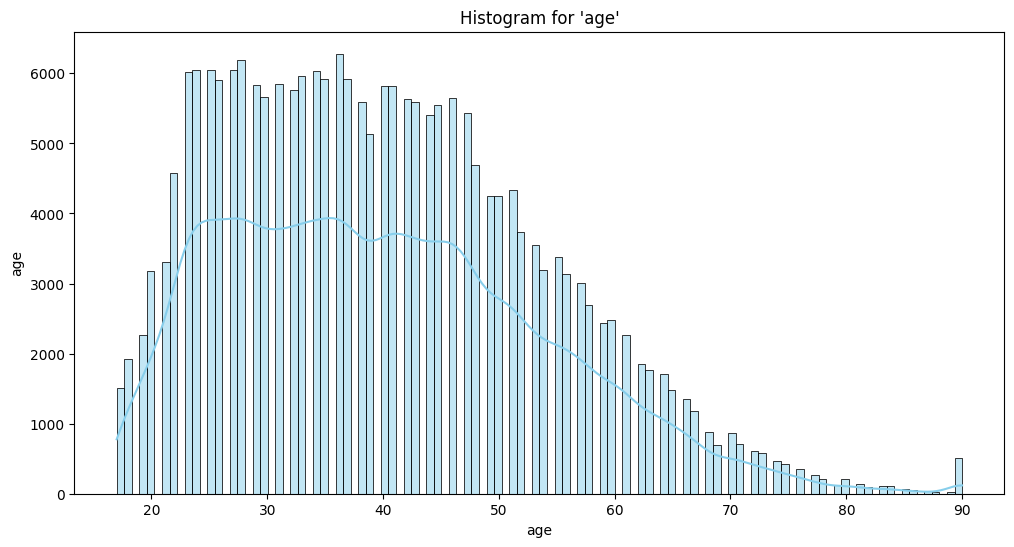

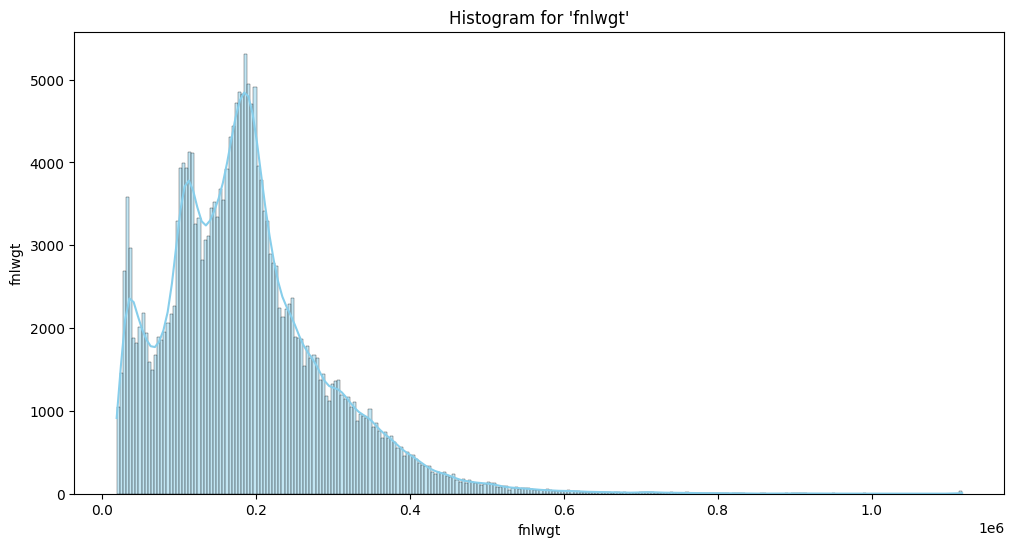

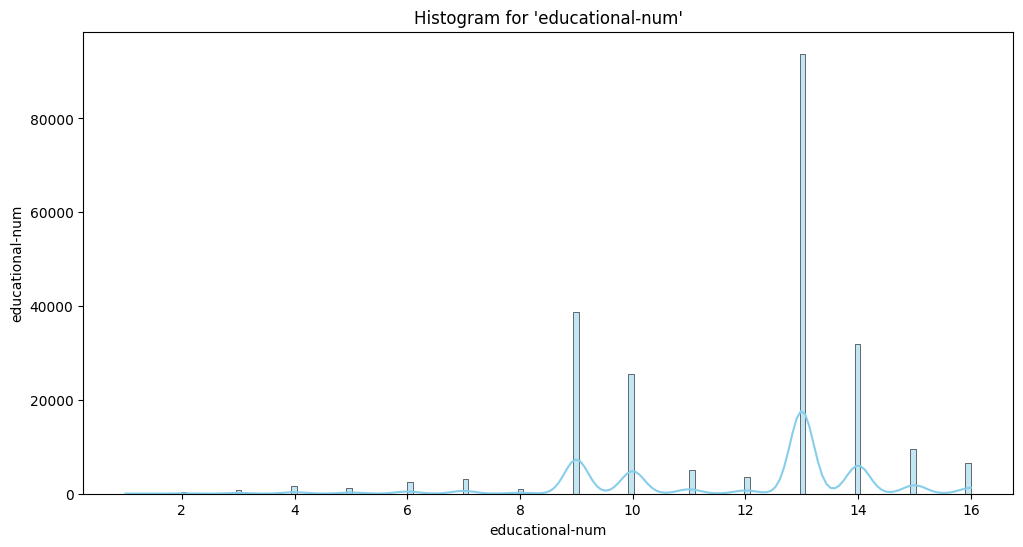

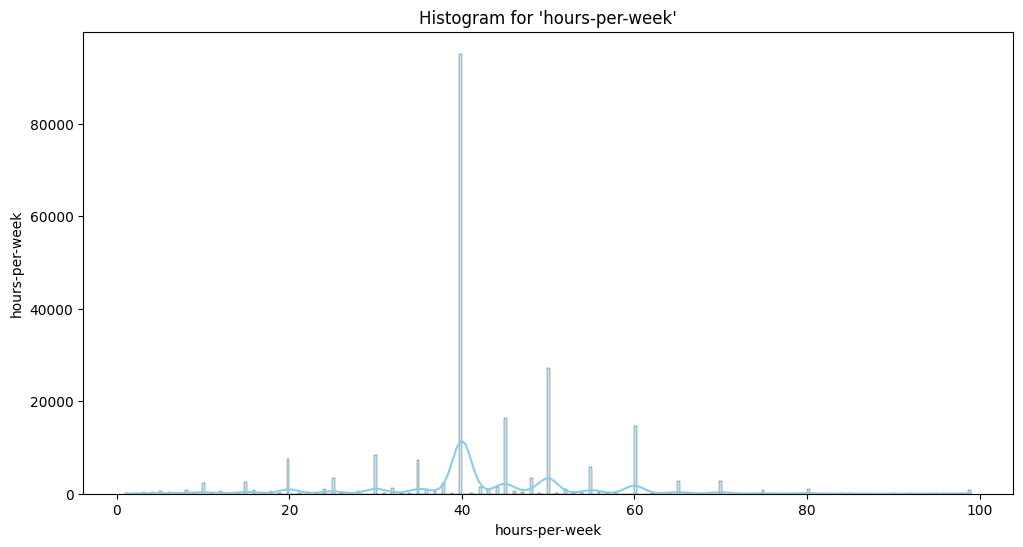

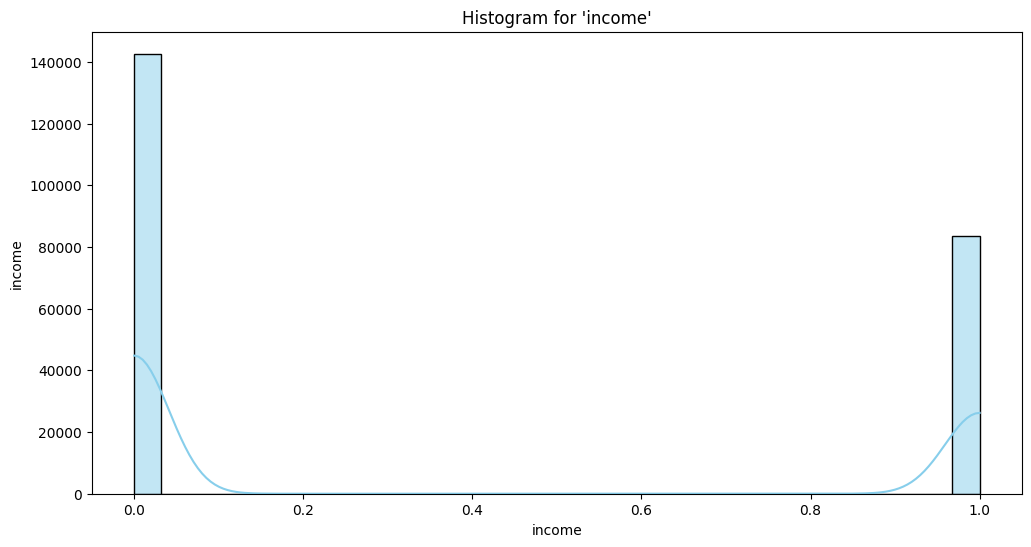

In [37]:
plot_numerical_features(df[df['institute']=='Bank A'], columns=col)

### Bank B

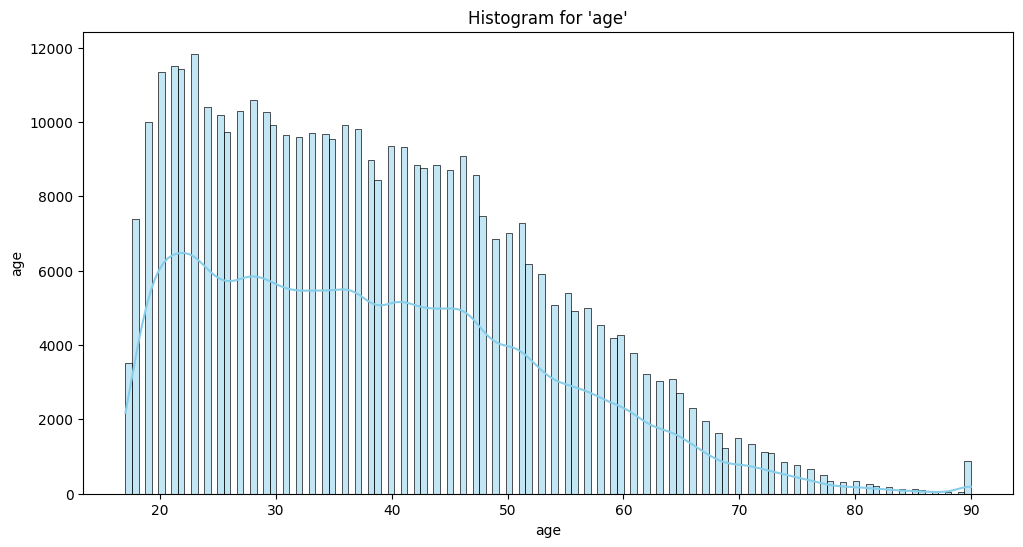

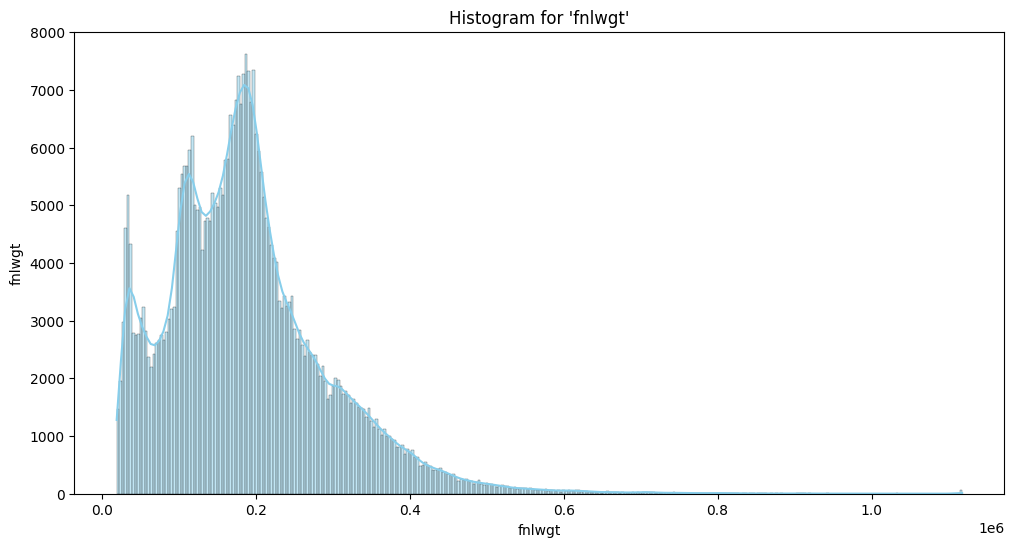

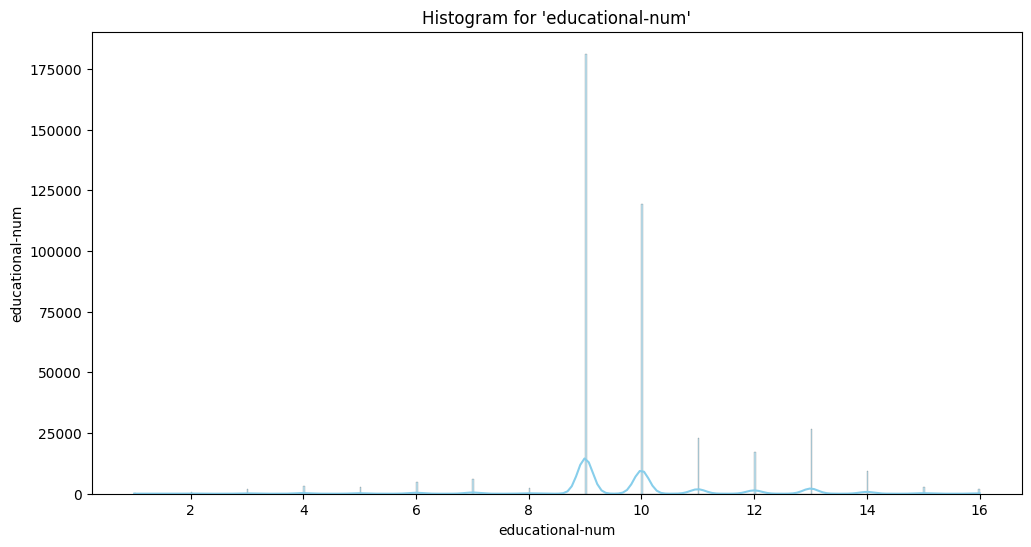

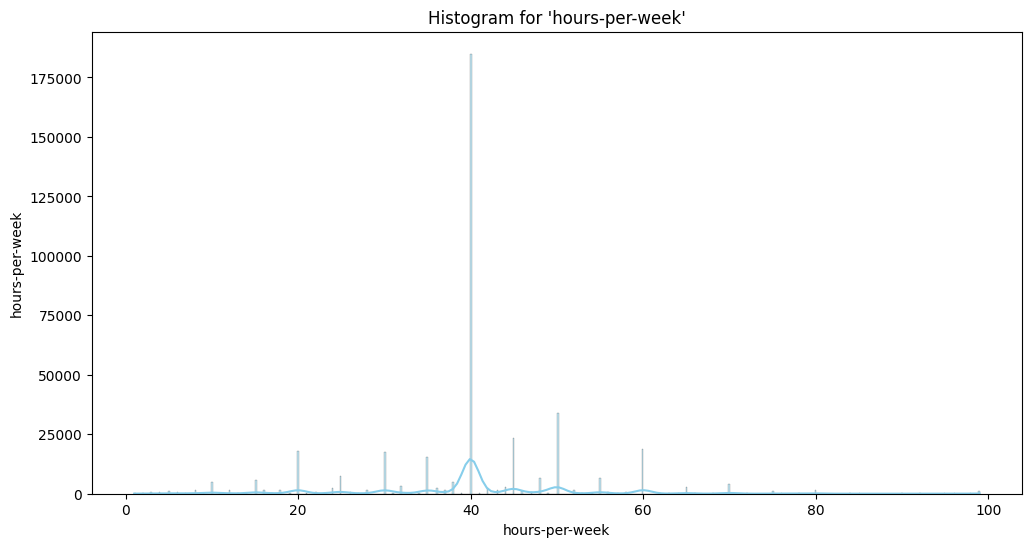

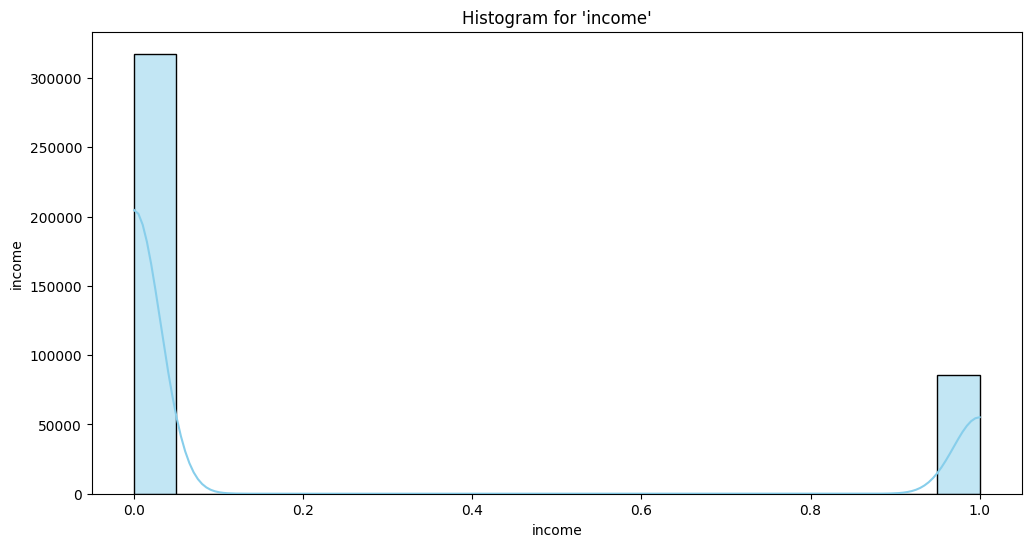

In [38]:
plot_numerical_features(df[df['institute']=='Bank B'], columns=col)

### Bank C

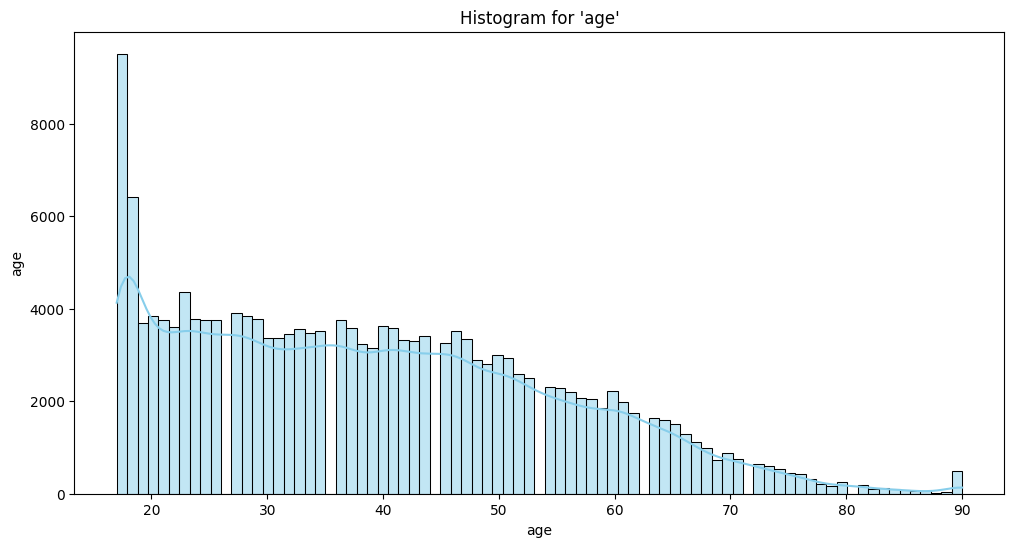

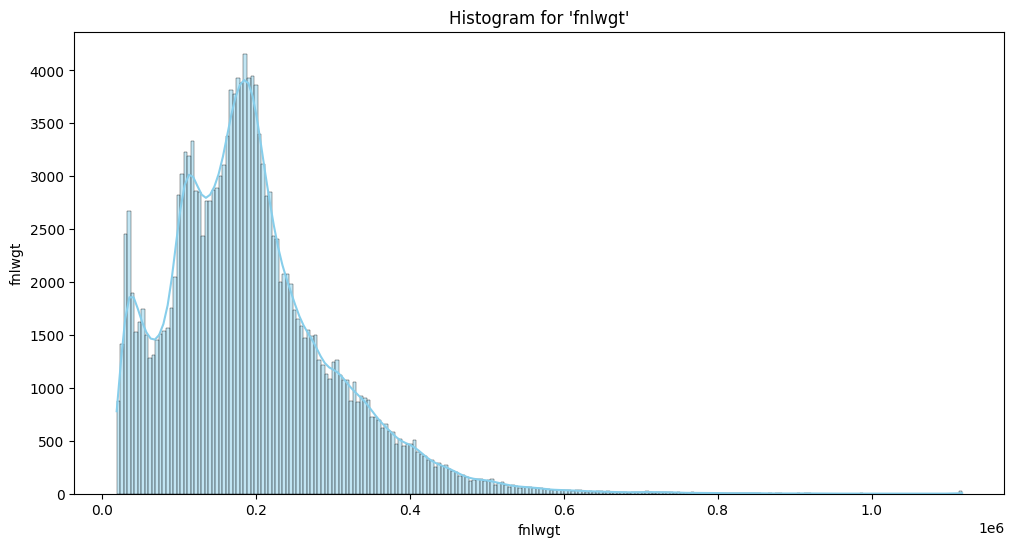

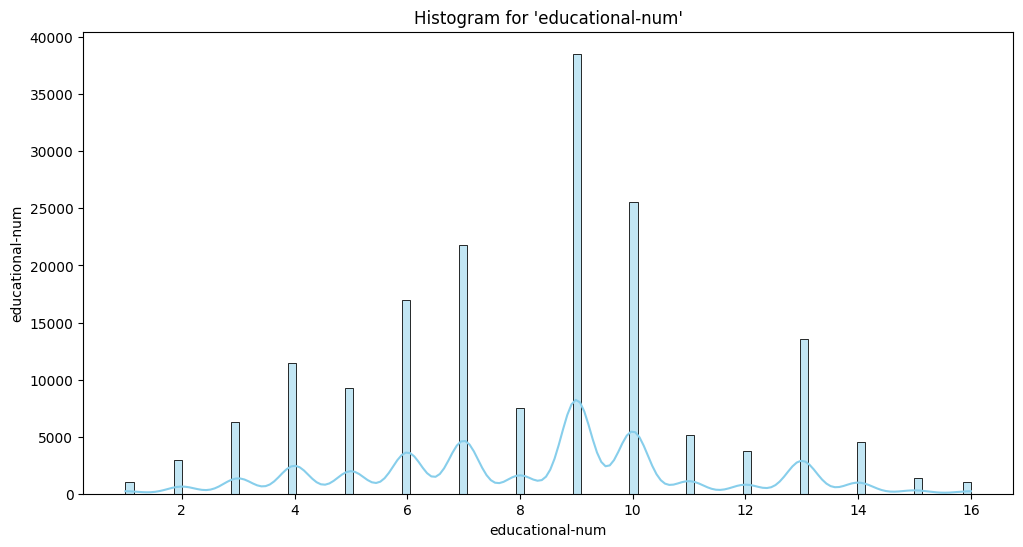

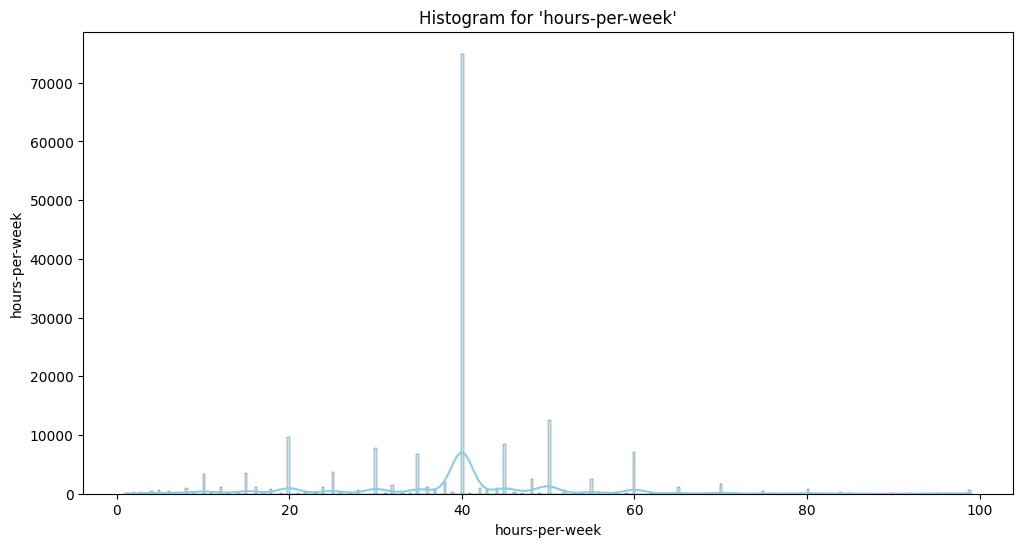

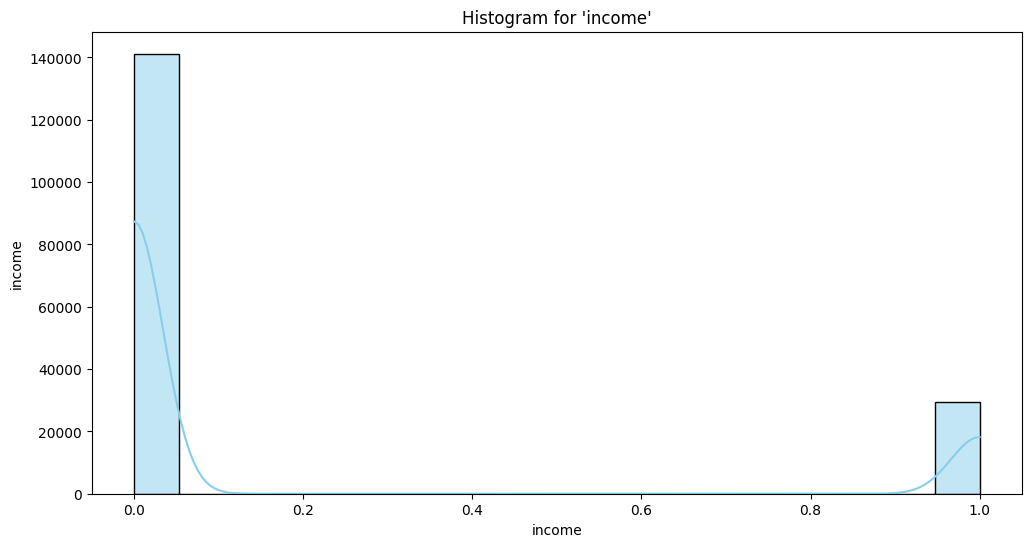

In [39]:
plot_numerical_features(df[df['institute']=='Bank C'], columns=col)

### descriptive analysis

In [40]:
cols = ['age', 'educational-num', 'hours-per-week']

print('Bank A:')
display(df[df['institute']=='Bank A'][cols].describe().T)
print('\nBank B:')
display(df[df['institute']=='Bank B'][cols].describe().T)
print('\nBank C:')
display(df[df['institute']=='Bank C'][cols].describe().T)

Bank A:


,count,mean,std,min,25%,50%,75%,max
age,226164.0,40.189840,13.692167,17.0,29.0,39.0,49.0,90.0
educational-num,226164.0,11.864046,2.445484,1.0,10.0,13.0,13.0,16.0
hours-per-week,226164.0,42.065386,12.853645,1.0,40.0,40.0,50.0,99.0



Bank B:


,count,mean,std,min,25%,50%,75%,max
age,403240.0,38.793106,14.404354,17.0,27.0,37.0,48.0,90.0
educational-num,403240.0,9.805513,1.772689,1.0,9.0,9.0,10.0,16.0
hours-per-week,403240.0,40.111750,12.719453,1.0,38.0,40.0,45.0,99.0



Bank C:


,count,mean,std,min,25%,50%,75%,max
age,170595.0,39.052669,15.926544,17.0,25.0,37.0,50.0,90.0
educational-num,170595.0,8.276304,3.001399,1.0,6.0,9.0,10.0,16.0
hours-per-week,170595.0,38.681984,13.781024,1.0,35.0,40.0,43.0,99.0


### Age Histogram

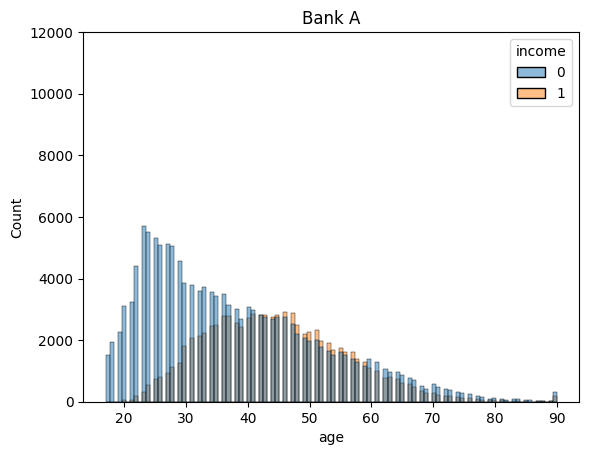

In [41]:
plt.title('Bank A')
plt.ylim(0, 12000)
sns.histplot(data=df[df['institute']=='Bank A'], x='age', hue='income');

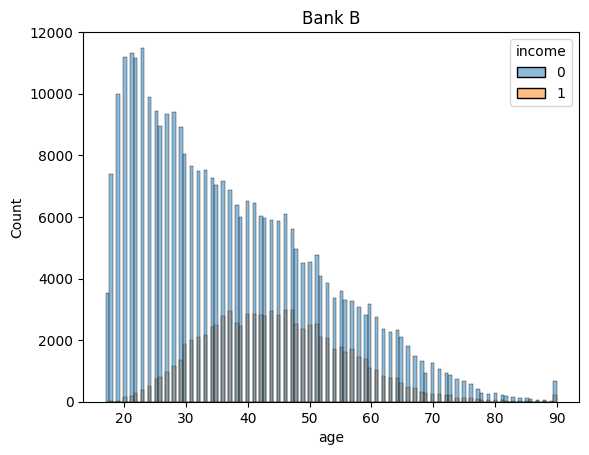

In [42]:
plt.title('Bank B')
plt.ylim(0, 12000)
sns.histplot(data=df[df['institute']=='Bank B'], x='age', hue='income');

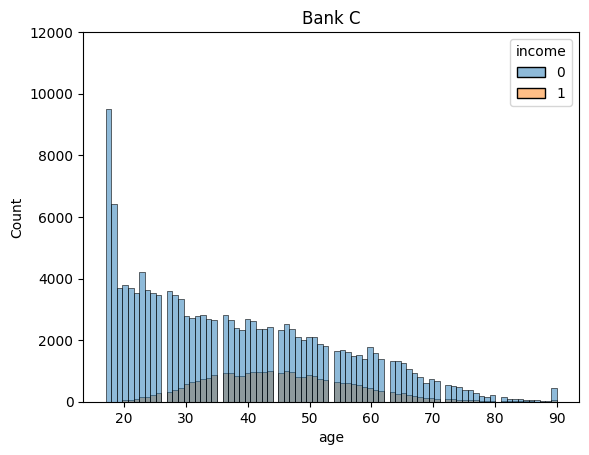

In [43]:
plt.title('Bank C')
plt.ylim(0, 12000)
sns.histplot(data=df[df['institute']=='Bank C'], x='age', hue='income');

### Education - Income

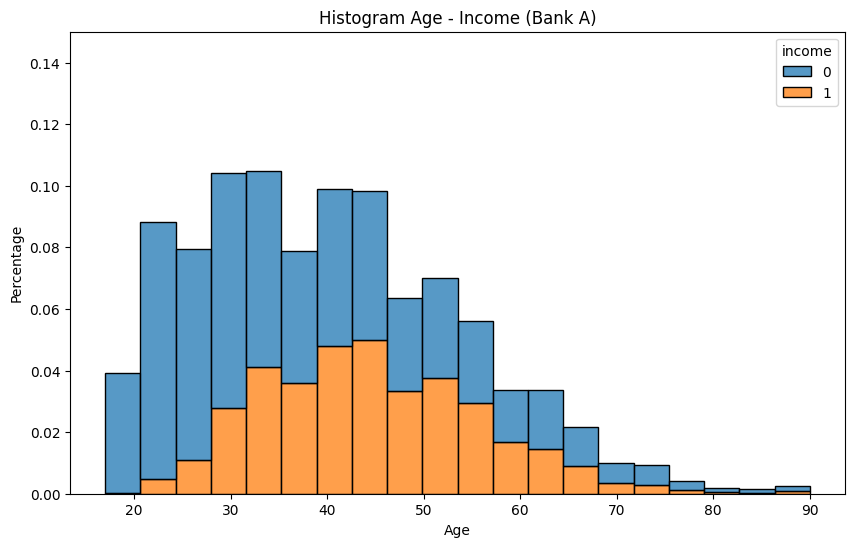

In [44]:
# Groupby und Value Counts
age_income_counts = df_a.groupby(['age', 'income']).size().reset_index(name='count')

# Prozentsätze berechnen
age_income_counts['percentage'] = age_income_counts['count'] / len(df_a)

# Histogramm mit Seaborn
plt.figure(figsize=(10, 6))
plt.ylim(0, 0.15)
sns.histplot(data=age_income_counts, x='age', hue='income', weights='percentage', bins=20, multiple='stack')
plt.title('Histogram Age - Income (Bank A)')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.show()

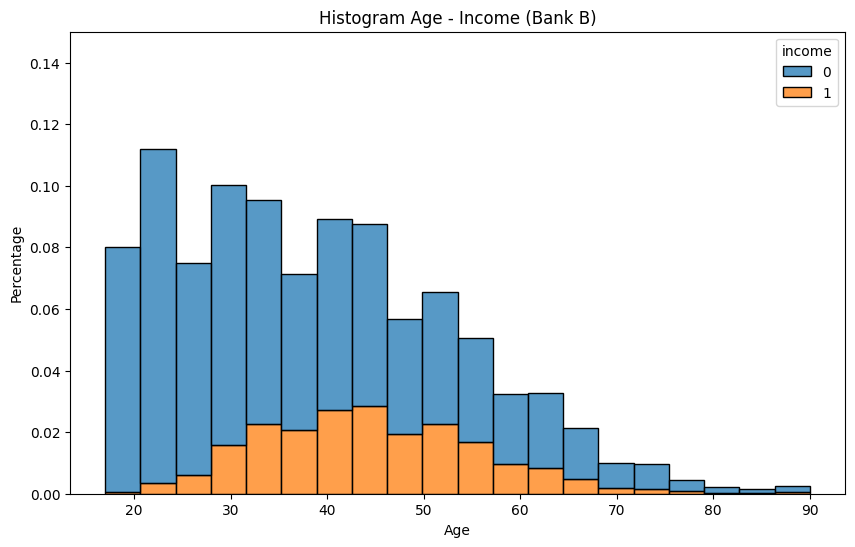

In [45]:
# Groupby und Value Counts
age_income_counts = df_b.groupby(['age', 'income']).size().reset_index(name='count')

# Prozentsätze berechnen
age_income_counts['percentage'] = age_income_counts['count'] / len(df_b)

# Histogramm mit Seaborn
plt.figure(figsize=(10, 6))
plt.ylim(0, 0.15)
sns.histplot(data=age_income_counts, x='age', hue='income', weights='percentage', bins=20, multiple='stack')
plt.title('Histogram Age - Income (Bank B)')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.show()

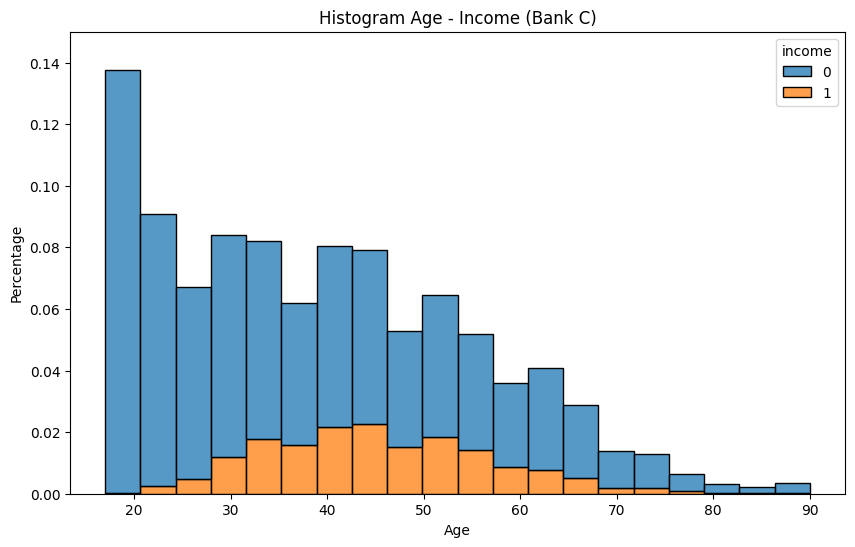

In [46]:
# Groupby und Value Counts
age_income_counts = df_c.groupby(['age', 'income']).size().reset_index(name='count')

# Prozentsätze berechnen
age_income_counts['percentage'] = age_income_counts['count'] / len(df_c)

# Histogramm mit Seaborn
plt.figure(figsize=(10, 6))
plt.ylim(0, 0.15)
sns.histplot(data=age_income_counts, x='age', hue='income', weights='percentage', bins=20, multiple='stack')
plt.title('Histogram Age - Income (Bank C)')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.show()

### Correlation Matrix after preprocessing:

In [47]:
columns_to_encode = ['workclass', 'education', 'marital-status', 'relationship', 'race', 'gender', 'native-country', 'occupation', 'income']
df_a_label_encoded = label_encode_columns(df_a, columns_to_encode)
df_a_label_encoded = df_a_label_encoded.drop(["institute", "educational-num"], axis=1)

df_b_label_encoded = label_encode_columns(df_b, columns_to_encode)
df_b_label_encoded = df_b_label_encoded.drop(["institute", "educational-num"], axis=1)

df_c_label_encoded = label_encode_columns(df_c, columns_to_encode)
df_c_label_encoded = df_c_label_encoded.drop(["institute", "educational-num"], axis=1)

df_all_label_encoded = label_encode_columns(df, columns_to_encode)
df_all_label_encoded = df_all_label_encoded.drop(["institute", "educational-num"], axis=1)

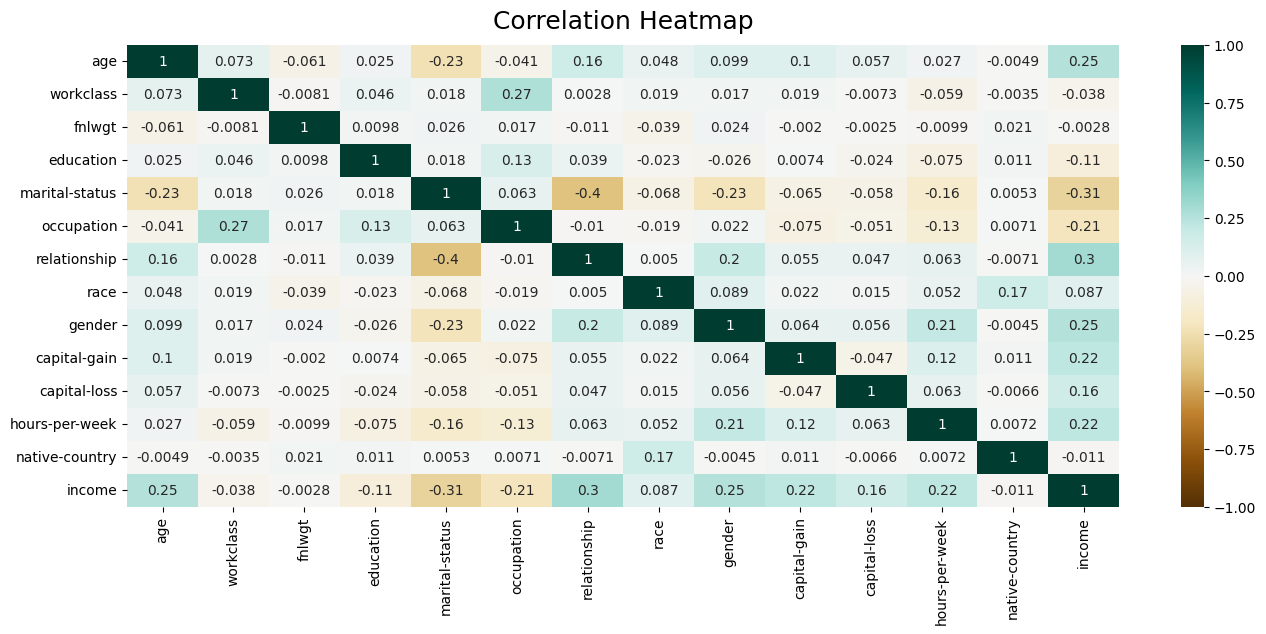

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_a_label_encoded.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

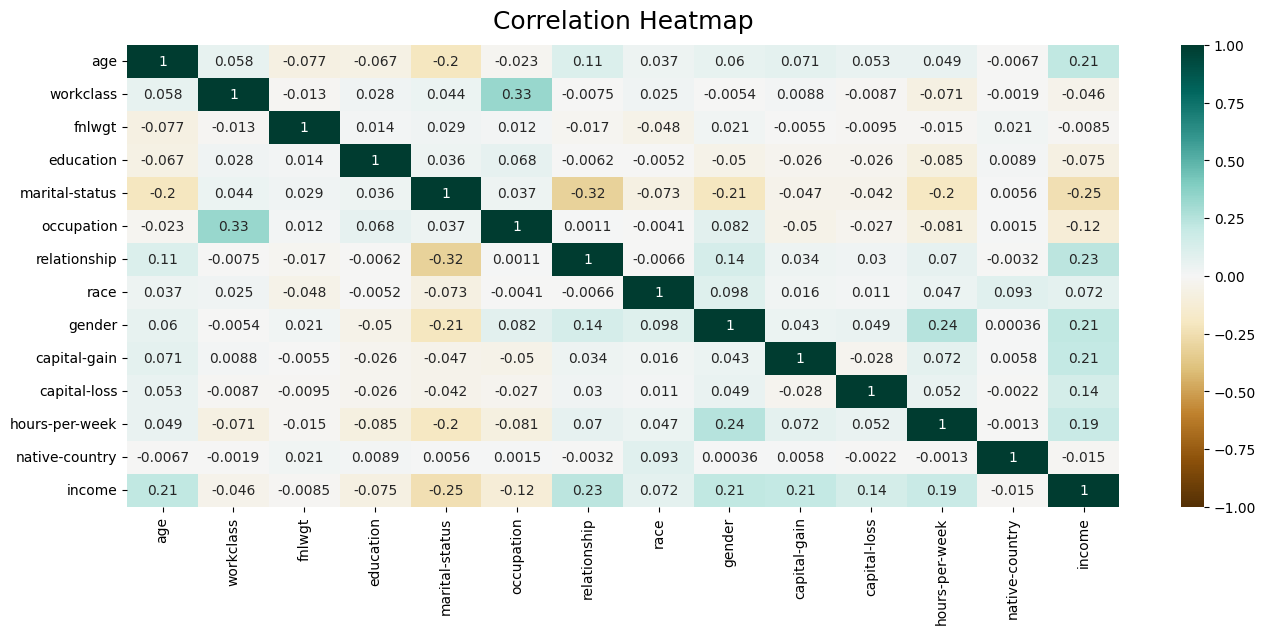

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_b_label_encoded.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

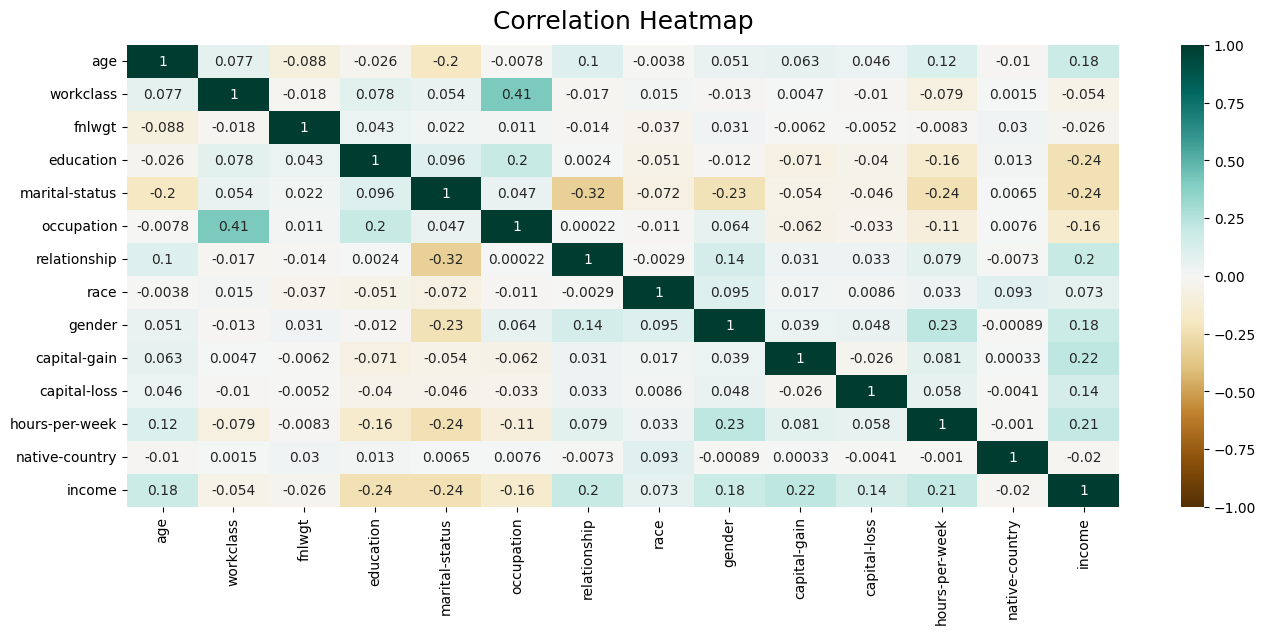

In [48]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_c_label_encoded.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

### Calculate VIF values

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [50]:
numeric_cols = df_a.select_dtypes(include=['int64']).columns

calc_vif(df_a[numeric_cols])

,variables,VIF
0,age,9.933722
1,workclass,6.291198
2,fnlwgt,4.065822
3,education,2.325371
4,educational-num,23.581162
5,marital-status,3.251457
6,occupation,2.312507
7,relationship,3.805282
8,race,7.984182
9,gender,3.516317


In [51]:
numeric_cols = df_b.select_dtypes(include=['int64']).columns

calc_vif(df_b[numeric_cols])

,variables,VIF
0,age,8.147511
1,workclass,7.139265
2,fnlwgt,4.077315
3,education,5.540475
4,educational-num,22.933026
5,marital-status,3.092121
6,occupation,3.818947
7,relationship,3.606274
8,race,7.022457
9,gender,3.192758


In [52]:
numeric_cols = df_c.select_dtypes(include=['int64']).columns

calc_vif(df_c[numeric_cols])

,variables,VIF
0,age,6.957554
1,workclass,7.842795
2,fnlwgt,4.071277
3,education,8.013539
4,educational-num,10.885059
5,marital-status,3.295740
6,occupation,4.485267
7,relationship,3.712023
8,race,6.296731
9,gender,3.282670


## Analysis of capital-gain and capital-loss


In [53]:
filtered_df = df[(df['capital-gain'] != 0) | (df['capital-loss'] != 0)]
filtered_df

,institute,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,Bank A,39,3,208353,0,13,1,0,3,1,1,7298,0,50,2,1
4,Bank A,66,4,31438,0,13,1,2,3,1,1,15024,0,40,2,1
9,Bank A,32,3,326480,4,15,1,0,3,1,1,7298,0,50,2,1
10,Bank A,48,1,66480,3,14,1,0,3,1,1,7688,0,40,2,1
24,Bank A,28,3,107517,3,14,3,1,0,1,0,0,1762,40,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170546,Bank C,69,5,227900,5,8,1,2,3,1,1,0,2179,40,2,0
170552,Bank C,50,3,210194,5,5,1,2,3,1,1,0,2415,99,2,1
170555,Bank C,72,7,98869,5,3,0,3,0,0,1,2918,0,1,2,0
170563,Bank C,56,5,208193,5,5,1,1,3,1,1,40000,0,40,2,0


In [54]:
filtered_df = filtered_df[['capital-gain', 'capital-loss', 'income']]

In [55]:
filtered_df['capital-gain'] = filtered_df['capital-gain'].apply(lambda x: 1 if x > 0 else x)
filtered_df['capital-loss'] = filtered_df['capital-loss'].apply(lambda x: 1 if x > 0 else x)

In [56]:
filtered_df.value_counts()

capital-gain  capital-loss  income
1             0             1         42826
                            0         25460
0             1             1         20642
                            0         19002
1             1             0            11
                            1             5
Name: count, dtype: int64

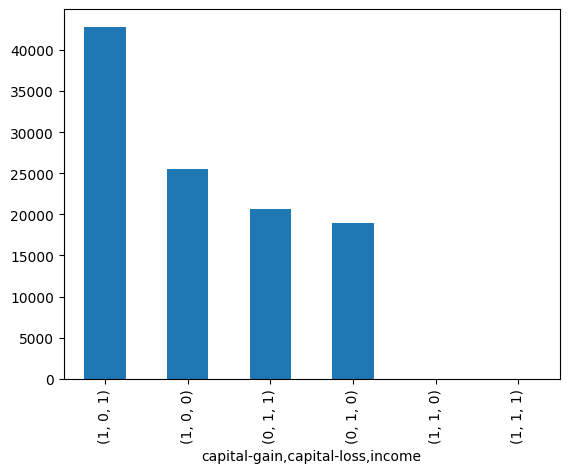

In [57]:
filtered_df.value_counts().plot(kind='bar');


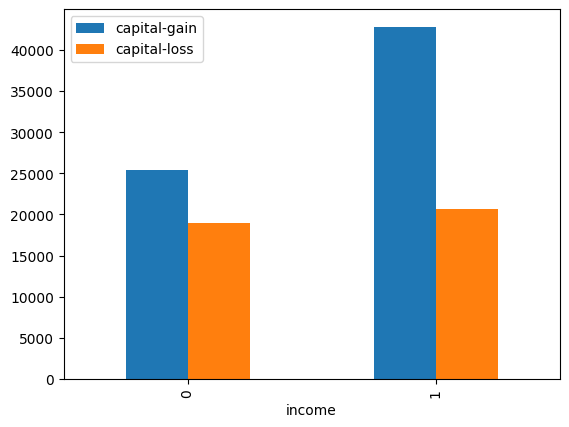

In [58]:
filtered_df.groupby('income').sum().plot(kind='bar');


## Preprocessing via files

In [17]:
df_a = pd.read_csv('../data/BankA_preprocessed.csv')
df_b = pd.read_csv('../data/BankB_preprocessed.csv')
df_c = pd.read_csv('../data/BankC_preprocessed.csv')

df_all = pd.concat([df_a, df_b, df_c])

In [18]:
# Convert age in bins of 10 years
df_all['age'] = pd.cut(df_all['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '>90'])
df_a['age'] = pd.cut(df_a['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '>90'])
df_b['age'] = pd.cut(df_b['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '>90'])
df_c['age'] = pd.cut(df_c['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '>90'])

### Correlation

In [19]:
columns_to_encode = ['age','workclass', 'education', 'marital-status', 'relationship', 'native-country', 'occupation']
df_a_label_encoded = label_encode_columns(df_a, columns_to_encode)
df_b_label_encoded = label_encode_columns(df_b, columns_to_encode)
df_c_label_encoded = label_encode_columns(df_c, columns_to_encode)

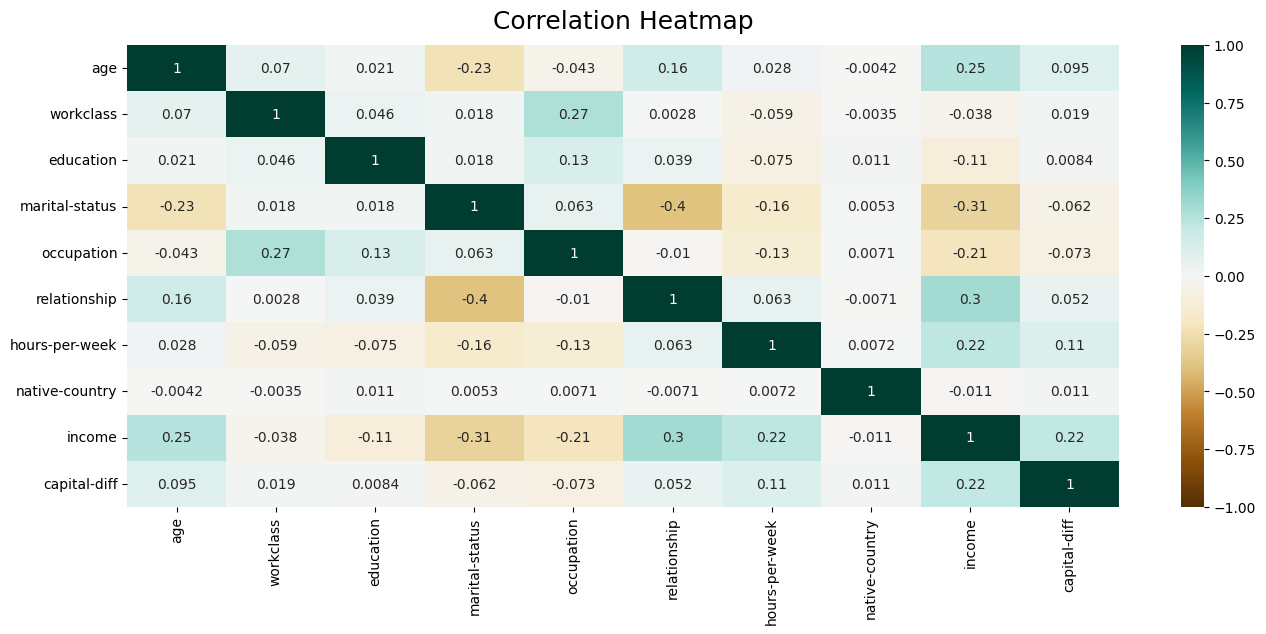

In [20]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_a_label_encoded.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

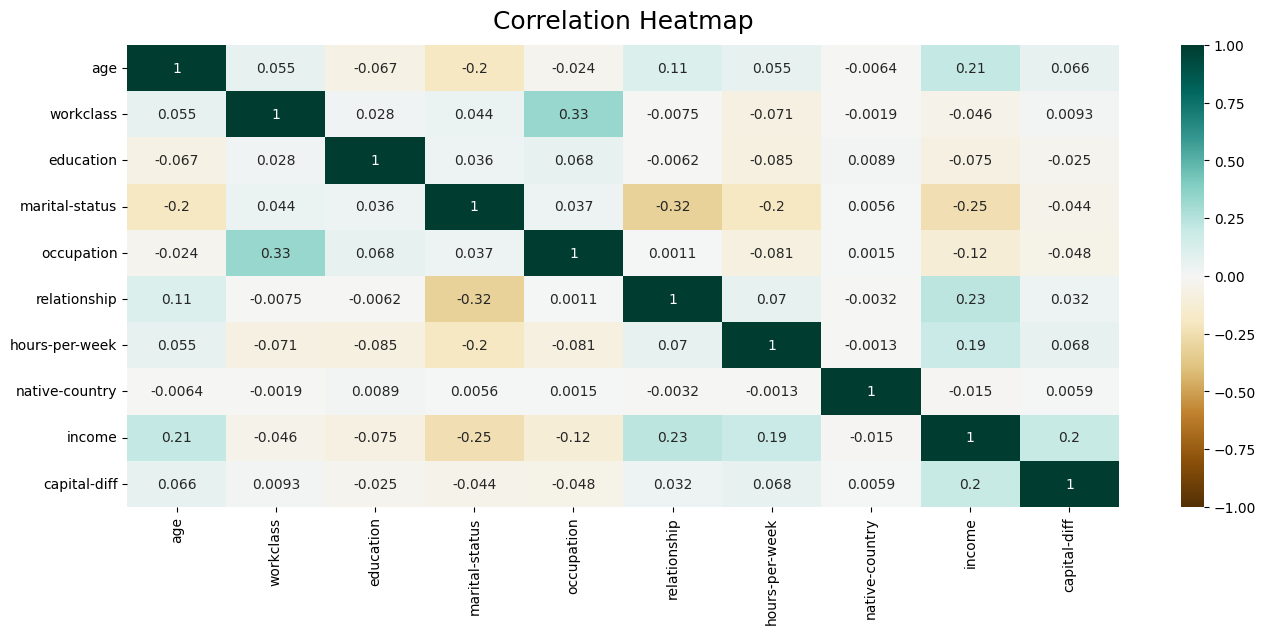

In [21]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_b_label_encoded.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

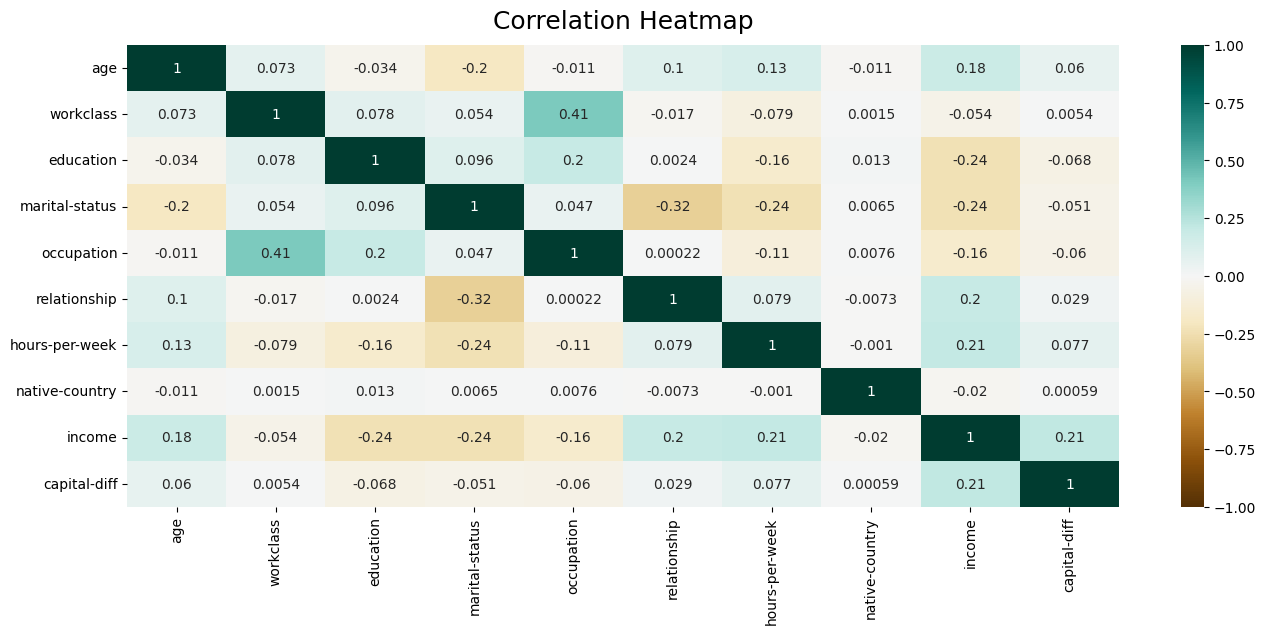

In [22]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_c_label_encoded.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

### VIF Values

In [25]:
df_a = pd.read_csv('../data/BankA_preprocessed.csv')
df_b = pd.read_csv('../data/BankB_preprocessed.csv')
df_c = pd.read_csv('../data/BankC_preprocessed.csv')

df_all = pd.concat([df_a, df_b, df_c])

In [26]:
# Convert age in bins of 10 years
df_all['age'] = pd.cut(df_all['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '>90'])
df_a['age'] = pd.cut(df_a['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '>90'])
df_b['age'] = pd.cut(df_b['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '>90'])
df_c['age'] = pd.cut(df_c['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '>90'])

#### Bank A

In [27]:
numeric_cols = df_a.select_dtypes(include=['int64']).columns

calc_vif(df_a[numeric_cols])

,variables,VIF
0,hours-per-week,1.668628
1,income,1.734930
2,capital-diff,1.083283


#### Bank B

In [ ]:
numeric_cols = df_b.select_dtypes(include=['int64']).columns

calc_vif(df_b[numeric_cols])

#### Bank C

In [28]:
numeric_cols = df_c.select_dtypes(include=['int64']).columns

calc_vif(df_c[numeric_cols])

,variables,VIF
0,hours-per-week,1.262362
1,income,1.316248
2,capital-diff,1.061130


#### Bank A/B/C

In [29]:
numeric_cols = df_all.select_dtypes(include=['int64']).columns

calc_vif(df_all[numeric_cols])

,variables,VIF
0,hours-per-week,1.395087
1,income,1.453112
2,capital-diff,1.067568
